# Dataset Domain And Background

## **Domain**


The scope of this project and therefore the dataset falls under **Phishing**.

Phishing is a type of cyberattack that utilises social engineering to manipulate targets into desired actions such as revealing sensitive information, downloading malware, etc. This is often executed via emails, text messages and phone calls where attackers impersonate trusted individuals like the authorities to deceive targets, tricking them into the desired action.

Despite its simplicity  compared to other cyberattacks like zero-day exploits, its appeal to human psychology make phishing attacks dangerously effective (with the median time taken for targets to fall for phishing emails being under 60 seconds according to the [2024 Verizon DBIR](https://www.verizon.com/business/resources/reports/2024-dbir-data-breach-investigations-report.pdf)), hence their popularity.

This project focuses on phishing via email as it is a highly popular method of phishing. According to the [2024 Cofense Annual State of Email Security Report](https://cofense.com/getmedia/db5a5ad7-b39a-45f5-bab7-eb165b9a0685/2024-cofense-annual-state-of-email-security-report.pdf), 91% of published cyber threat reports began with phishing. Moreover, [the 2024 Verizon DBIR states that 94% of malware is delivered via email attachments](https://hoxhunt.com/guide/phishing-trends-report#key-phishing-statistics-for-2025).

Email phishing is often used in:
- Bulk email phishing
  - Attackers indiscriminately send emails to as many people as possible to capture as many targets as possible.
- Spear phishing
  - A targeted attacked where victims are primarily those with access to sensitive data or authority that can be exploited.
- Business email compromise (BEC)
  - A subset of spear phishing targeting business organisations with the intention of stealing money or intel such as trade secrets.

Recently, the mainstream usage of Large Language Models (LLMs) such as GPT models via platforms like ChatGPT make phishing emails easier to generate for attackers. For instance, attackers may prompt these LLMs for tailored emails in perfect grammar, punctuation and spelling, getting rid of language errors that used to be a key flag in detecting phishing emails. These LLMs can generate various and decently realistic emails quickly based on prompt quality, allowing phishing operations to grow quicker than before. According to IBM's X-Force Threat Intelligence Index, it would take an attacker 16 hours to manually come up with a phishing email, but with artificial intelligence such as LLMs, they can create more convincing emails in five minutes.

Still, one of the main defences against phishing include email filters utilising Machine Learning (ML) algorithms to identify phishing emails as they come and segregate them to a folder such as 'spam', based on existing data of phishing emails. It is a fast, automated approach that can be kept up to date as the algorithms get fine-tuned on newer phishing data.

This project will produce either a ML or Deep Learning (DL) model using a phishing email dataset to mimic real-life email filters and later experiment with attacks against and defenses for the model under the "Evade ML Model" technique of the MITRE ATLAS framework, specifically where adversarial  data is crafted to mislead email filters into believing a phishing email is safe in order to bypass filters and enter the target's view.

## **Dataset Background**
The dataset "[Phishing Emails Detection](https://www.kaggle.com/datasets/subhajournal/phishingemails)" by subhajournal on Kaggle is a collection of email body content extracted from emails to help the detection of phishing emails via text analysis and classification using ML.

It contains 18,600 emails labelled either as "Safe Email" or "Phishing Email". Most are safe emails as is the case in the real world where phishing attempts-- while increasingly common--represent a fraction of the vast volume of normal emails sent daily.

The dataset has been used in academic studies, such as in papers:
- "Robust Email Phishing Detection using Machine Learning and Deep Learning Approach" by Fares et al.
- "An Explainable Transformer-based Model for Phishing Email Detection: A Large Language Model Approach" by Uddin and Sarker
- "Machine Learning Approach for Email Phishing Detection" by Fares et al.

Its popularity and adoption in these papers is for its:
- diversty of emails.
- decent sample size.
- specialisation towards phishing detection.

Therefore, this dataset was chosen as it could serve as a decently realistic but controlled sample set for real-world emails, which is good for exploring the practical defense against ML model evasion of phishing detectors like email filtering systems.

**Sources**:
1. https://www.ibm.com/think/topics/phishing
2. https://www.ibm.com/think/topics/phishing
3. https://hoxhunt.com/guide/phishing-trends-report#key-phishing-statistics-for-2025
4. https://www.verizon.com/business/resources/reports/2024-dbir-data-breach-investigations-report.pdf
5. https://cofense.com/getmedia/db5a5ad7-b39a-45f5-bab7-eb165b9a0685/2024-cofense-annual-state-of-email-security-report.pdf
6. https://www.kaggle.com/datasets/subhajournal/phishingemails

# Set Up


In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.colors import qualitative as qcolors
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import re
import string
from bs4 import BeautifulSoup
from bs4 import MarkupResemblesLocatorWarning
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import optuna
import joblib

from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional, LayerNormalization
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Nadam, Adam, RMSprop
import os
import shutil
from tensorflow.keras.models import load_model

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score, accuracy_score
import torch.nn as nn

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Ignore warnings from BeautifulSoup regarding markups that look like URLs
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
# Ignore warnings during ML training
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
# Set seed for reproducibility
SEED = 42

# Preliminary Data Cleaning and Exploration

In [ ]:
# Load the dataset
email_df = pd.read_csv('Phishing_Email.csv')
email_df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
# Get column names
email_df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

## Remove Unnecessary Index Column

In [ ]:
# Remove index column 'Unnamed: 0' as it is not needed
email_df = email_df.drop(columns=['Unnamed: 0'])
email_df.columns

Index(['Email Text', 'Email Type'], dtype='object')

## Removing Missing Values And Empty Emails

In [ ]:
# Check for missing values
print(email_df.isnull().sum())

Email Text    16
Email Type     0
dtype: int64


In [ ]:
# Remove samples with missing values
email_df = email_df.dropna()
print(email_df.isnull().sum())

Email Text    0
Email Type    0
dtype: int64


In [ ]:
# Check for any empty emails
print((email_df['Email Text'].str.strip() == '').sum())

3


In [ ]:
# Check the 3 samples detected with empty emails
email_df[email_df['Email Text'].str.strip() == '']

,Email Text,Email Type
9605,\n,Phishing Email
13593,\n,Phishing Email
16281,\n,Phishing Email


It turns out that the 3 samples are truly empty emails with just a newline character (these emails likely contained just empty lines), but were somehow labelled as phishing emails.

These samples are not helpful for phishing detection so they will be removed.

In [ ]:
# Remove samples with empty emails
email_df = email_df[email_df['Email Text'].str.strip() != '']
print((email_df['Email Text'].str.strip() == '').sum())

0


## Removing Duplicate Emails

In [ ]:
# Find any duplicate emails
num_duplicates_text = email_df.duplicated(subset=['Email Text']).sum()
duplicates_text = email_df[email_df.duplicated(subset=['Email Text'])]

print(f'Number of duplicate emails: {num_duplicates_text}')
duplicates_text

Number of duplicate emails: 1095


,Email Text,Email Type
106,empty,Safe Email
130,empty,Phishing Email
244,empty,Phishing Email
305,empty,Phishing Email
335,empty,Phishing Email
...,...,...
18607,empty,Safe Email
18626,empty,Safe Email
18637,empty,Phishing Email
18643,empty,Safe Email


In [ ]:
# Remove rows containing duplicate emails
email_df = email_df.drop_duplicates(subset=['Email Text'])

Also remove emails with just 'empty' because they don't contain any useful features

Moreover, there are emails with 'empty' belonging in both classes, so it may confuse the model on whether empty emails are suspcious or not

In [ ]:
# Remove emails containing 'empty'
email_df = email_df[email_df['Email Text'].str.lower() != 'empty']
# Check if there are any left
email_df[email_df['Email Text'].str.lower() == 'empty']

,Email Text,Email Type


In [ ]:
# Check number of rows left
email_df.shape

(17535, 2)

## Check Dataset Proportions

Look at proportion of phishing and safe emails after removing missing values and empty emails

In [ ]:
# Count the number of each email type
email_counts = email_df['Email Type'].value_counts().reset_index()
email_counts.columns = ['Email Type', 'Count']

# Create a pie chart
distribution_plot = px.pie(email_counts, names='Email Type', values='Count', title='Distribution of Email Types (Safe vs Phishing)', color_discrete_sequence=[qcolors.Dark24[0], qcolors.T10[2]])
distribution_plot.update_traces(textfont_size=15)
distribution_plot.show()

There is some data imbalance, so additional preprocessing could be applied to the dataset to manage this to prevent model bias.

At this point, duplicate the dataset as it is now so one copy is for ML preprocessing and another for DL preprocessing, as methods differ from here on.

## Encoding Target Column

In [ ]:
# Change 'Email Type' column to binary column 'Phishing'
# value 0 indicates a safe email while value 1 indicates a phishing email
email_df['Phishing'] = email_df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)

# Remove original 'Email Type' column since it is replaced with 'Phishing'
email_df = email_df.drop(columns=['Email Type'])

## Create Dataset Copies for ML and DL

Create one copy each of the dataset with the earlier basic cleaning steps applied - one for ml and one for dl.

This is because ml and dl datasets will undergo different preprocessing from now on.

In [ ]:
email_df_ml = email_df.copy()
email_df_dl = email_df.copy()

In [ ]:
email_df_ml.head()

,Email Text,Phishing
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


In [ ]:
email_df_dl.head()

,Email Text,Phishing
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


# Models To Experiment With
### Machine Learning (ML)
1. Logistic Regression
  - Logistic regression is chosen as a simple baseline while itself potentially being an effective and interpretable phishing email detector.
  - It is also efficient and commonly used for binary classification.
2. Support Vector Machine (SVM) - Linear Support Vector Classifier (LinearSVC)
  - SVMs are chosen because it decides a hyperplane that best separates classes instead of modelling probabilities directly, which could make them more robust than Logistic Regression for text classification as it focuses more on separation than fitting to a distribution.
  - LinearSVC specifically is used as it is effective for handling high dimensional data.
   
Later in Data Exploration And Preprocessing, feature generation and selection will be done to more explicitly capture text features since ML models usually work better with well-defined tabular data.

### Deep Learning (DL)
3. Long Short-Term Memory (LSTM)
  - LSTMs are designed to capture long-term dependencies  and handle sequential data, making them well-suited for longer text data like emails.
5. Pre-trained DeBERTa V3 XSmall
  - DeBERTa is a transformer-based model that has been shown to excel at language understanding tasks, which could make it effective for phishing detection by understanding subtle phrasing cues in emails.
  - DeBERTa specifically incorporates disentangled attention and relative position embeddings.
    - With disentangled attention, it allows the model to understand both word meanings and the effects of a word's position on a sentence's meaning.
    - With relative position embeddings, the model considers the distance between words rather than their absolute position.
    - These enhancements potentially could improve accuracy in detecting phishing emails by better adapting to varying sentence structures and capturing more subtle cues.
  - Utilising the pre-trained model which has been trained on vast and varied text such as Wikipedia and PENWEBTEXT (Reddit content) also makes it potentially robust, which is especially necessary when defending against adversarial  attacks during model evasion.
  - The V3 XSmall version is used specifically as it is the smallest variant but offers a balance between performance and efficiency. It is necessary in the resource-limited scope of this project.
   
For DL models, feature generation will not be done as the models expect cleaned text as input and are capable of automatic feature learning. Potentially, the DL models may notice features neglected during feature generation for ML models.

# Machine Learning (ML)

## Feature Engineering

Potential features to be created for ML models could be the:
- Length of the email content defined by the number of words
    - Unusually short or long emails may indicate phishing emails or at least suspcious behavior
    - Phishing emails may be short as they lack contextual information, or may be inflated to prevent detection by ML models
- Number of URLs in the email
    - Phishing emails are expected to have more URLs inside to lure victims into clicking malicious links
- Length of URLs
    - Phishing emails may use URL shorteners on their malicious links to disguise them as something innocent
- Proportion of non-alphabetical characters (e.g., punctuation, special characters)
    - Phishing emails may have more non-alphabetical characters such as HTML tags to obfuscate malicious content, imitate legitimate-looking URLs or email addresses or evade filters
    - Phishing emails may also use more punctuation such as exclamation marks or dashes to create a sense of urgency
- Frequency of exclamation marks
    - A more specific version of proportion of non-alphabetical characters
    - Phishing emails are expected to have more exclamations to show urgency
- Frequency of uppercase words
    - Phishing emails are expected to have more uppercase words to show urgency

This section explores if there is any pattern in these features for safe vs phishing emails

In [ ]:
# Generate column of word counts in each email
email_df_ml['Word Count'] = email_df_ml['Email Text'].apply(lambda x: len(x.split()))

In [ ]:
# Regular expresion to capture URLs
url_regex = re.compile(
    r'(https?:\/\/|www\.)'      # Captures protocol (http://, https://) or www. subdomain of URl
    r'([a-zA-Z0-9\-#.]+)'       # Captures subdomain and domain
    r'(\/[^\s]*)?'              # Captures any path after domain, if any (e.g., '/path/to/page' from 'https://example.com/path/to/page')
)

In [ ]:
# Generate column of number of URLs using above regular expression to detect them
email_df_ml['URL Count'] = email_df_ml['Email Text'].apply(lambda x: len(url_regex.findall(x)))

In [ ]:
# Function to calculate the average (mean) length of URls in each email
def calculate_average_url_length(text):
    # Collect all the URls in the sample
    urls = url_regex.findall(text)

    # If there's no URLs in the sample, average is 0
    if len(urls) == 0:
        return 0

    # If there are URLs, initialise the total length of all URLs as 0
    total_length = 0
    # Add the length of each URL to total_length before calculating average URL length
    for url in urls:
        # Sum the length of each group in the detected URL to calculate the full URL's length
        url_length = len(url[0]) + len(url[1]) + (len(url[2]) if url[2] else 0)
        total_length += url_length

    return total_length / len(urls)

In [ ]:
# Generate column for average length of URLs in email
email_df_ml['Average URL Length'] = email_df_ml['Email Text'].apply(calculate_average_url_length)

In [ ]:
# Function to calculate the proportion of emails which are non alphabetical characters, without spaces
# else attackers may use spaces to inflate emails and fake a "safe" proportion
def calculate_non_alphabetical_proportion(text):
    # Remove spaces from the text
    text = text.replace(' ', '')

    # Edge case if text becomes empty after removing spaces
    if len(text) == 0:
        return 0

    # Count non-alphabetical characters (excluding spaces)
    non_alpha_count = sum(1 for c in text if not c.isalpha())

    # Proportion of non-alphabetical characters (excluding spaces)
    return non_alpha_count / len(text)

In [ ]:
# Generate column for proportion of non-alphabetical characters
email_df_ml['Non-Alphabetical Proportion'] = email_df_ml['Email Text'].apply(calculate_non_alphabetical_proportion)

In [ ]:
# Function to calculate the proportion of emails that are exclamation marks, without spaces
# else attackers may use spaces to fake a "safe" proportion
def calculate_exclamation_proportion(text):
    # Remove spaces to get the count of all non-space characters
    text_no_spaces = text.replace(' ', '')
    length = len(text_no_spaces)

    if length == 0:
        return 0

    exclamation_count = text.count('!')
    proportion = exclamation_count / length
    return proportion

In [ ]:
# Create column for proportion of exclamation marks in an email
email_df_ml['Exclamation Proportion'] = email_df_ml['Email Text'].apply(calculate_exclamation_proportion)

In [ ]:
# Function to calculate the proportion of uppercase words in each email
def calculate_uppercase_word_proportion(text):
    # Split the email into words
    words = text.split()

    # Edge case if email is empty - Proportion will be 0
    if len(words) == 0:
        return 0

    # Calculate how many words in the email are in uppercase (e.g., 'ALERT')
    uppercase_words = sum(1 for word in words if word.isupper())
    # Divide the number of uppercased words by the total number of words in the email to get the proportion of uppercased words in the email
    return uppercase_words / len(words)

In [ ]:
# Generate column for frequency of uppercase words
email_df_ml['Uppercase Word Frequency'] = email_df_ml['Email Text'].apply(calculate_uppercase_word_proportion)

In [ ]:
# Split main dataset by class to get sub-datasets of each safe and phishing emails
safe_emails = email_df_ml[email_df_ml['Phishing'] == 0]
phishing_emails = email_df_ml[email_df_ml['Phishing'] == 1]

In [ ]:
safe_emails.head()

,Email Text,Phishing,Word Count,URL Count,Average URL Length,Non-Alphabetical Proportion,Exclamation Proportion,Uppercase Word Frequency
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,230,0,0.0,0.087391,0.002497,0.00000
1,the other side of * galicismos * * galicismo *...,0,91,0,0.0,0.046272,0.000000,0.00000
2,re : equistar deal tickets are you still avail...,0,305,0,0.0,0.168969,0.000000,0.00000
5,global risk management operations sally congra...,0,592,0,0.0,0.060281,0.000000,0.00000
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",0,153,1,41.0,0.123859,0.000000,0.03268


In [ ]:
phishing_emails.head()

,Email Text,Phishing,Word Count,URL Count,Average URL Length,Non-Alphabetical Proportion,Exclamation Proportion,Uppercase Word Frequency
3,\nHello I am your hot lil horny toy.\n I am...,1,96,1,30.0,0.287293,0.001842,0.083333
4,software at incredibly low prices ( 86 % lower...,1,91,0,0.0,0.082621,0.000000,0.000000
7,"entourage , stockmogul newsletter ralph velez ...",1,1384,0,0.0,0.059171,0.000797,0.000000
8,"we owe you lots of money dear applicant , afte...",1,142,0,0.0,0.122881,0.000000,0.000000
10,make her beg you to give it to her everynight ...,1,302,0,0.0,0.054561,0.005115,0.000000


For each feature, the distributions of the feature's values among safe email samples against phishing email samples will be observed via kde plot for a comprehensive view of any general trends.

In [ ]:
# Function to generate a kde plot comparing a feature's values for safe emails versus phishing emails
def plot_kde(safe_data, phishing_data, feature, x_max=None):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=safe_data, x=feature, label='Safe Email', fill=True, common_norm=False, color='green')
    sns.kdeplot(data=phishing_data, x=feature, label='Phishing Email', fill=True, common_norm=False, color='red')
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

    if x_max:
        plt.xlim(0, x_max)

    plt.tight_layout()
    plt.show

### Distribution of Word Counts Per Class

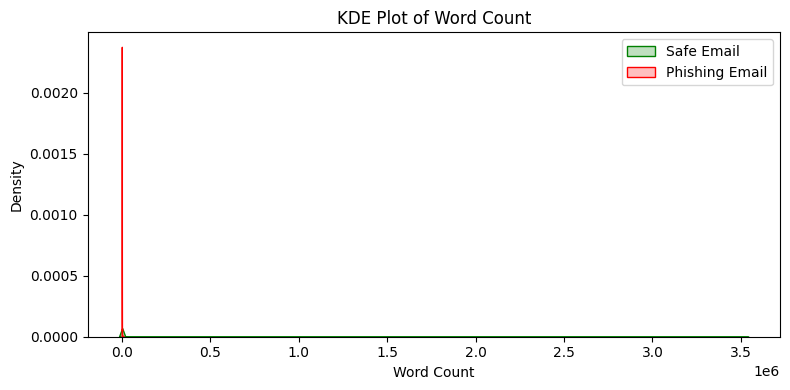

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Word Count')

The plot is too narrow at the peaks, likely compressed due to outliers causing long tails. Zooming in could help.

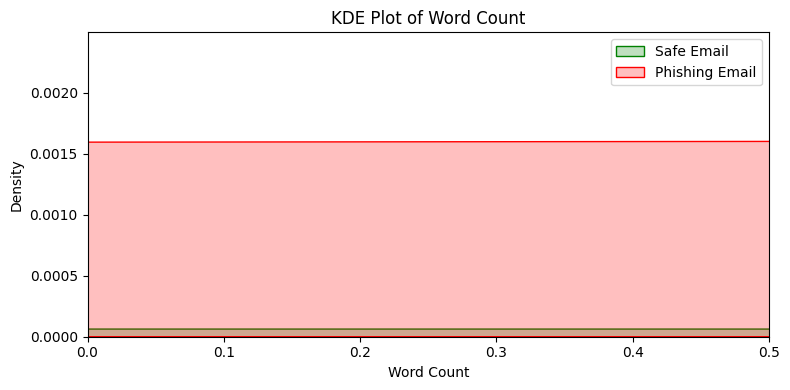

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Word Count', x_max=0.5)

The zoomed in plot does not help much either. It just shows that generally more phishing emails have the lower word counts, but no other patterns. A histogram plot will be used instead to see the distribution.

In [ ]:
# Word count histogram for safe emails
fig_safe_word_count = px.histogram(
    safe_emails,
    x='Word Count',
    nbins=50,
    title='Word Count Distribution - Safe Emails',
    labels={'word_count': 'Number of Words'}
)
fig_safe_word_count.show()

In [ ]:
# Word count histogram for phishing emails
fig_phish_word_count = px.histogram(
    phishing_emails,
    x='Word Count',
    nbins=50,
    title='Word Count Distribution - Phishing Emails',
    labels={'word_count': 'Number of Words'}
)
fig_phish_word_count.show()

There is an obvious difference in terms of word count between safe and phishing emails.

Safe emails have a wider distribution of word counts from 0 to 90,000 words (with one exceptionally long email being 3.5 million to 3.59 million words), while phishing emails have a narrower range of 0 to 12,000 words. Most phishing emails are also under 2000 words. This means that in general, phishing emails tend to be shorter than safe emails, though safe emails can be both short and long.

Therefore, word count can be a useful feature for detecting phishing emails, as shorter emails may indicate phishing attempts, while very long emails are more likely to be safe. This should be combined with other features for more comprehensive comparison though as safe emails can be short too.

### Distributions of URLs Per Class

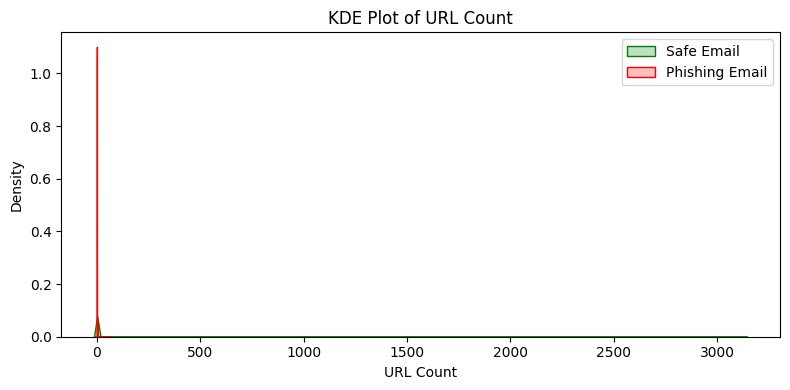

In [ ]:
plot_kde(safe_emails, phishing_emails, 'URL Count')

The peaks again look very narrow due to a long tail. Zooming in could help.

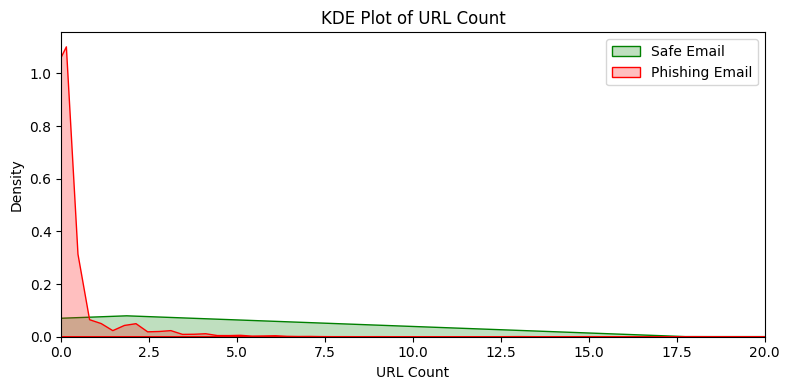

In [ ]:
plot_kde(safe_emails, phishing_emails, 'URL Count', x_max=20)

### Length of URLs

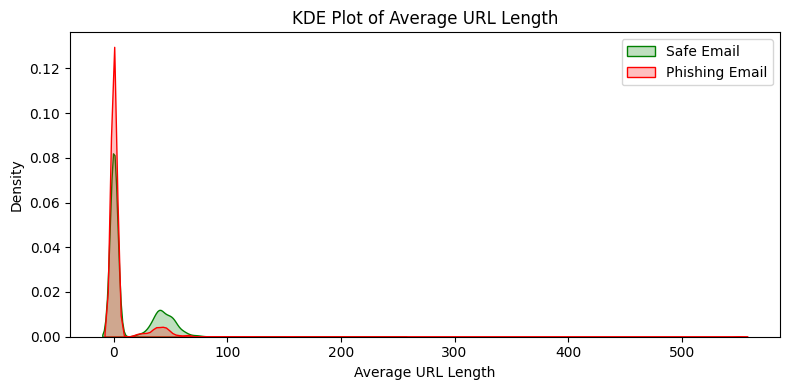

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Average URL Length')

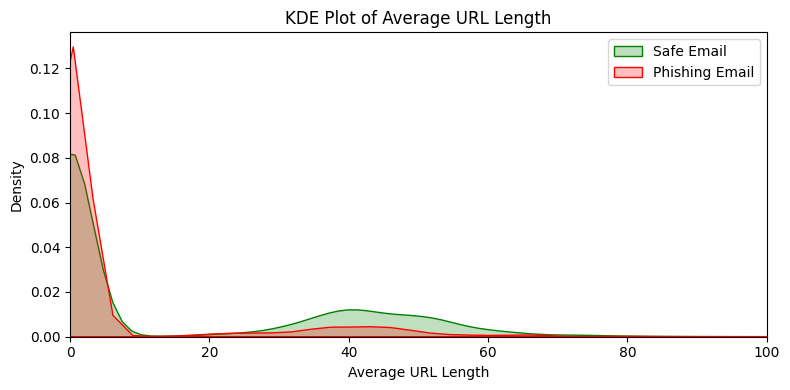

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Average URL Length', x_max=100)

Differing distributions could be seen in both the default and zoomed in plots. In general, safe emails seem to have longer average URL length based on its peaks being lower at the lower lengths and higher at the higher lengths. However, phishing emails have URLs that may be both very short and exceptionally long because the peak of average URL length for phishing emails is pushed to the far left, but its range extends to the very long tail towards the right.

### Proportion of Non-Alphabetical Character

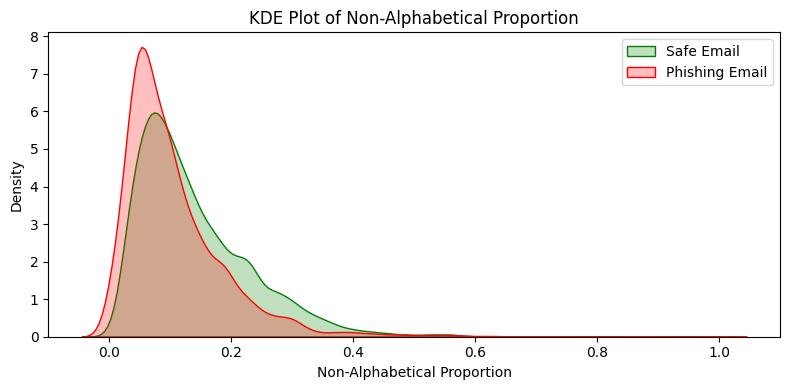

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Non-Alphabetical Proportion')

There is a slight distinction between the distribution of non-alphabetical proportion for phishing emails versus safe emails. It seems, contrary to assumptions, that the proportion for phishing emails are mainly lower judging by the peak (however it can be very high too because the distribution drags out to the long tail). The peak of non-alphabetical proportion for phishing emails is lower than that for safe emails.

### Frequency of Exclamations

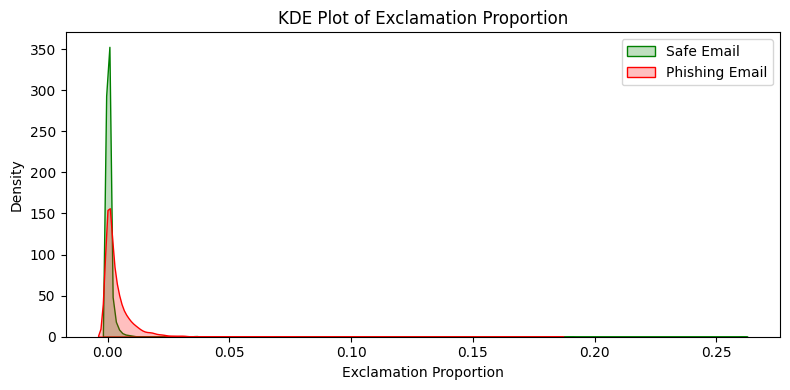

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Exclamation Proportion')

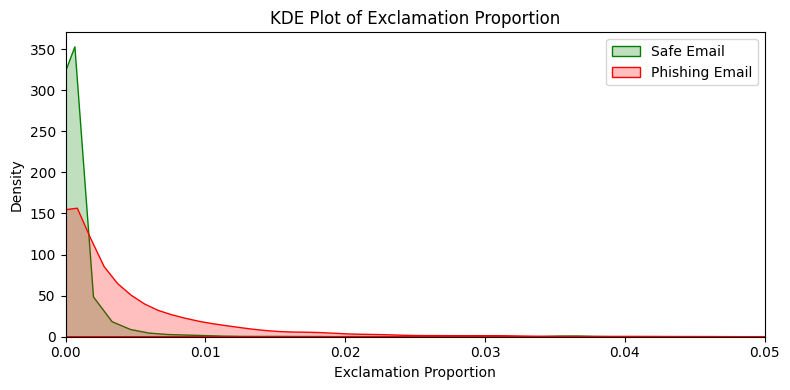

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Exclamation Proportion', x_max=0.05)

Judging by the distribution, phishing emails generally have more exclamation marks, as expected. The distribution of exclamation proportion peaks for safe emails near 0. Though phishing emails have a similar peak, it reduces more gradually and has a longer tail at higher proportions.

### Frequency of Uppercase Words

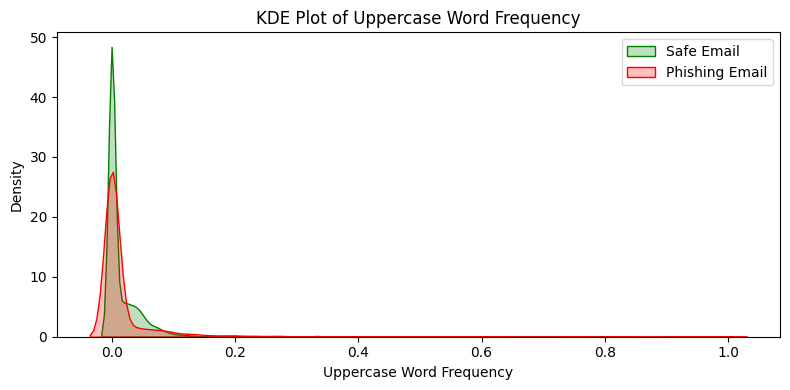

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Uppercase Word Frequency')

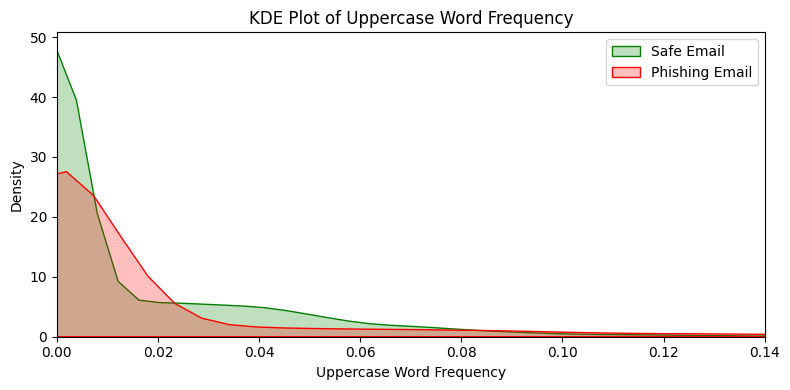

In [ ]:
plot_kde(safe_emails, phishing_emails, 'Uppercase Word Frequency', x_max=0.14)

The plot shows that there is some distinction in the distribution of uppercase word frequency in phishing and safe emails. The distinction is not so clear as they have similar peaks but different subsequent distributions.

### Check for multi-collinearity

Before using the features, check for multi-collinearity that could affect ML models by feeding in excessively high-dimensional data, especially as the vectorised text data already would result in high dimensionality.

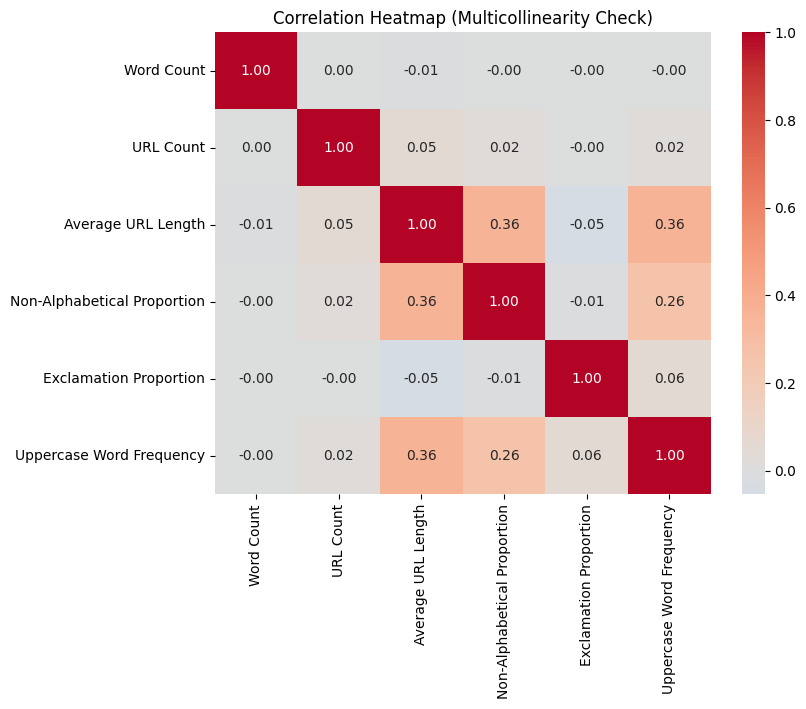

In [ ]:
# Compile created features
features = ['Word Count', 'URL Count', 'Average URL Length',  'Non-Alphabetical Proportion', 'Exclamation Proportion', 'Uppercase Word Frequency']

# Compute the correlation matrix of these features
corr_matrix = email_df_ml[features].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap (Multicollinearity Check)')
plt.show()

There seems to be no significant correlation between any of the generated features, so all are kept.

## Raw Text Cleaning

Text cleaning for ML models will follow the below steps:
1. Remove HTML tags
  - Emails, especially professional ones, are usually HTML-formatted. Whether an email is HTML-formatted or not a very important indicator of phishing emails as genuine professional emails may be HTML-formatted, likewise phishing emails meant to mimic them. Ultimately, the tags are just noise and thus will be removed.
2. Remove URLs
  - URL details already captured in distribution of URLs and length of URLs features.
3. Reduce excessive whitespace
  - Extra whitespaces are unnecessary fillers and may affect tokenisation in from the TF-IDF vectoriser.
4. Convert all text to lowercase
  - Words that are actually the same will be treated as different according to the vectoriser if it has different capitalisation. To reduce dimensionality of the feature space after vectorisation, all text will be converted to lowercase so such words will be seen as similar.
5. Tokenise the text
  - Necessary for later steps.
6. Remove non-alphabetical characters (punctuation, numbers, special characters)
  - Presence of non-alphabetical characters are already captured in the proportion of non-alphabetical characters and frequency of exclamations features.
7. Remove stopwords (except for phishing specific words like "click", "now", etc.)
  - Stopwords usually don't add value.
8. Lemmatisation
  - To reduce words to their base form in order to prevent feature space inflation due to different word forms being seen as different.

In [ ]:
# Define phishing-specific keywords to keep
phishing_keywords = {'click', 'now', 'verify', 'account', 'login', 'update', 'password', 'action'}

In [ ]:
# Function to clean raw text for ML models
def preprocess_email(text):
    # Remove URLs
    text = url_regex.sub(' ', text)

    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text(separator=' ')

    # Reduce excessive whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Clean tokens by stripping leading and trailing non-alphabetic characters, and keeping only those that still contain at least one letter (removing non-alphabetical characters)
    tokens = [re.sub(r'^[^a-zA-Z]+|[^a-zA-Z]+$', '', t) for t in tokens if re.search(r'[a-zA-Z]', t)]

    # Remove stopwords except phishing keywords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [t for t in tokens if (t not in stop_words) or (t in phishing_keywords)]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in filtered_tokens]

    # Join the tokens back together to form full clean text
    return ' '.join(lemmatized_tokens)

In [ ]:
# Clean Email Text
email_df_ml['Email Text'] = email_df_ml['Email Text'].apply(preprocess_email)

## Data Splitting

In [ ]:
# Extract target column
y = email_df_ml['Phishing']

# Extract feature columns
X = email_df_ml.drop(columns=['Phishing'])

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [ ]:
X_train[:3]

,Email Text,Word Count,URL Count,Average URL Length,Non-Alphabetical Proportion,Exclamation Proportion,Uppercase Word Frequency
7626,rtp conference hill yes think done london righ...,251,0,0.0,0.170492,0.0,0.0
3858,nom actual flow vols agree forwarded melissa j...,144,0,0.0,0.350299,0.0,0.0
16545,celebration innovative sped enos jeffrey bookc...,63,0,0.0,0.085165,0.0,0.0


In [ ]:
X_test[:3]

,Email Text,Word Count,URL Count,Average URL Length,Non-Alphabetical Proportion,Exclamation Proportion,Uppercase Word Frequency
907,request submitted access request chris clark e...,99,0,0.0,0.150396,0.000000,0.000000
6637,better stock performance otc heip ine homeland...,1702,0,0.0,0.044260,0.000000,0.000000
12809,adam beberg writes tue sep kragen sitaker wrot...,642,5,55.8,0.118696,0.000308,0.040498


In [ ]:
# Save columns to variables for easier access
text_column = 'Email Text'
numeric_columns = ['Word Count', 'URL Count', 'Average URL Length',  'Non-Alphabetical Proportion', 'Exclamation Proportion', 'Uppercase Word Frequency']

## Models

To get the best version of the models, hyper-parameter tuning will be done to find the best combination of hyper-parameters for each model.

Tuning is also done for the TF-IDF vectoriser to see its best configurations for text feature capturing.



---



**Bayesian optimisation** via Optuna will be used for tuning as it intelligently trials promising combinations based on previous trials' results instead of blindly testing random combinations or all combinations like in Random Search or Grid Search.



---



Hyper-parameter values to test are decided based on a moderate range to experiment with reducing overfitting and underfitting in mind.

In tuning, weighted f1-score (which accounts for class imbalance) will be used as the evaluation metric to determine the best model version. This is to prioritise both the reduction of false negatives and false positives.


### Logistic Regression

In [ ]:
# Define objective function for Logistic Regressor for tuning
def objective_lr(trial):
    # Define TF-IDF hyper-parameter search space
    ngram_min = trial.suggest_int('ngram_min', 1, 2)
    ngram_max = trial.suggest_int('ngram_max', ngram_min, 3)
    min_df = trial.suggest_float('min_df', 0.001, 0.05)
    max_df = trial.suggest_float('max_df', 0.8, 1.0)
    # Define Logistic Regressor hyper-parameter search space
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga', 'sag'])
    C = trial.suggest_float('C', 1e-2, 1e2, log=True)
    max_iter = trial.suggest_int('max_iter', 50, 200)

    # Define preprocessing pipeline to vectorise text and scale generated features before model input
    preprocessor = ColumnTransformer(
        transformers=[
            ('tfidf', TfidfVectorizer(strip_accents='unicode',
                                      ngram_range=(ngram_min, ngram_max),
                                      min_df=min_df,
                                      max_df=max_df),
             text_column),
            ('scaler', RobustScaler(), numeric_columns)
        ]
    )

    # Create the model with class_weight='balanced' to account for class imbalance so that model weights will be tuned tailored to the imbalance
    model = LogisticRegression(C=C, solver=solver, max_iter=max_iter,
                             class_weight='balanced', random_state=SEED)

    # Create full pipeline with preprocessing and classification steps
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Use 5-fold cross validation to define an evaluation metric for finding the best model version
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted').mean()
    return score

In [ ]:
study_lr = optuna.create_study(
    study_name='lr_study',
    direction='maximize', # Goal is to maximise weighted f1-score
    storage='sqlite:///lr.db',  # Saves trials to disk in case session crashes
    load_if_exists=True # Resume from last trial if process was started previously
)

# Overall tuning should run for 50 trials for a moderate-scale search
total_trials = 50
# Calculated number of trials completed already (for logging)
completed_trials = len(study_lr.trials)
remaining = total_trials - completed_trials

print(f'Trials completed so far (Logistic Regression): {completed_trials}')
print(f'Resuming with {remaining} more trials...')

if remaining > 0:
    study_lr.optimize(objective_lr, n_trials=remaining, n_jobs=-1)
else:
    print('All trials completed already.')

# Save the best hyper-parameter combination found
# best_params_lr = study_lr.best_params

[I 2025-05-23 14:05:55,383] A new study created in RDB with name: lr_study


Trials completed so far (Logistic Regression): 0
Resuming with 50 more trials...


[I 2025-05-23 14:08:51,678] Trial 0 finished with value: 0.9562593751989208 and parameters: {'ngram_min': 1, 'ngram_max': 3, 'min_df': 0.02588182678530337, 'max_df': 0.9136647169821962, 'solver': 'lbfgs', 'C': 3.2163464642077826, 'max_iter': 192}. Best is trial 0 with value: 0.9562593751989208.
[I 2025-05-23 14:08:52,850] Trial 1 finished with value: 0.7122299232111571 and parameters: {'ngram_min': 1, 'ngram_max': 3, 'min_df': 0.041044727282669766, 'max_df': 0.9217097823720344, 'solver': 'sag', 'C': 28.076163993498874, 'max_iter': 185}. Best is trial 0 with value: 0.9562593751989208.
[I 2025-05-23 14:10:31,194] Trial 2 finished with value: 0.9533247083967924 and parameters: {'ngram_min': 1, 'ngram_max': 2, 'min_df': 0.01742280511378163, 'max_df': 0.8148967627255941, 'solver': 'lbfgs', 'C': 0.29492060101908635, 'max_iter': 98}. Best is trial 0 with value: 0.9562593751989208.
[I 2025-05-23 14:10:38,705] Trial 3 finished with value: 0.9767870510028935 and parameters: {'ngram_min': 1, 'ngr

In [ ]:
study_lr = optuna.create_study(
    study_name='lr_study',
    direction='maximize', # Goal is to maximise weighted f1-score
    storage='sqlite:///lr.db',  # Saves trials to disk in case session crashes
    load_if_exists=True # Resume from last trial if process was started previously
)

# Overall tuning should run for 50 trials for a moderate-scale search
total_trials = 50
# Calculated number of trials completed already (for logging)
completed_trials = len(study_lr.trials)
remaining = total_trials - completed_trials

print(f'Trials completed so far (Logistic Regression): {completed_trials}')
print(f'Resuming with {remaining} more trials...')

if remaining > 0:
    study_lr.optimize(objective_lr, n_trials=remaining, n_jobs=-1)
else:
    print('All trials completed already.')

# Save the best hyper-parameter combination found
best_params_lr = study_lr.best_params

[I 2025-05-23 14:29:41,207] Using an existing study with name 'lr_study' instead of creating a new one.


Trials completed so far (Logistic Regression): 23
Resuming with 27 more trials...


[I 2025-05-23 14:30:27,647] Trial 24 finished with value: 0.9791996985223242 and parameters: {'ngram_min': 1, 'ngram_max': 1, 'min_df': 0.0012251640742836148, 'max_df': 0.844673535507906, 'solver': 'lbfgs', 'C': 14.148222393146794, 'max_iter': 145}. Best is trial 14 with value: 0.9800695580656302.
[I 2025-05-23 14:30:27,683] Trial 23 finished with value: 0.977573918365229 and parameters: {'ngram_min': 1, 'ngram_max': 1, 'min_df': 0.0011724236471617753, 'max_df': 0.8416452821169649, 'solver': 'lbfgs', 'C': 16.678553044110487, 'max_iter': 149}. Best is trial 14 with value: 0.9800695580656302.
[I 2025-05-23 14:31:08,407] Trial 25 finished with value: 0.9708192712101139 and parameters: {'ngram_min': 1, 'ngram_max': 1, 'min_df': 0.00837698919801575, 'max_df': 0.8460744620029252, 'solver': 'lbfgs', 'C': 17.998192184201564, 'max_iter': 134}. Best is trial 14 with value: 0.9800695580656302.
[I 2025-05-23 14:31:10,146] Trial 26 finished with value: 0.9716098244138307 and parameters: {'ngram_min

 Some trials not shown - likely too low iterations resulting in failed convergence

In [ ]:
study_lr = optuna.create_study(
    study_name='lr_study',
    direction='maximize', # Goal is to maximise weighted f1-score
    storage='sqlite:///lr.db',  # Saves trials in case session crashes
    load_if_exists=True # Resume from last trial if process was started previously
)

# Overall tuning should run for 50 trials for a moderate-scale search
total_trials = 50
# Calculated number of trials completed already (for logging)
completed_trials = len(study_lr.trials)
remaining = total_trials - completed_trials

print(f'Trials completed so far (Logistic Regression): {completed_trials}')
print(f'Resuming with {remaining} more trials...')

if remaining > 0:
    study_lr.optimize(objective_lr, n_trials=remaining, n_jobs=-1)
else:
    print('All trials completed already.')

# Save the best hyper-parameter combination found
best_params_lr = study_lr.best_params

[I 2025-05-23 14:45:54,294] Using an existing study with name 'lr_study' instead of creating a new one.


Trials completed so far (Logistic Regression): 50
Resuming with 0 more trials...
All trials completed already.


In [ ]:
print('Best hyperparameters for Logistic Regression:')
print(best_params_lr)

Best hyperparameters for Logistic Regression:
{'ngram_min': 1, 'ngram_max': 2, 'min_df': 0.0012870905352243456, 'max_df': 0.8728756753036294, 'solver': 'lbfgs', 'C': 6.2347838263000614, 'max_iter': 165}


It seems that for TF-IDF for logistic regression, capturing unigrams and bigrams as well, likely as it provides a comprehensive view of the email syntax. Moreoever, filtering out only extremely rare words appearing in around under 0.13% of documents and extremely common words appearing in around 87% of documents is a good balance to ensure captured text features are informative but not limited.

As for hyper-parameters of the logistic regressor, it seems the best combination came as moderate regularisation more iterations allowed lets the model better fit the complexity of email text.

In [ ]:
# Build final pipeline with best hyper-parameters
preprocessor_lr = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(strip_accents='unicode',
                                  ngram_range=(best_params_lr['ngram_min'], best_params_lr['ngram_max']),
                                  min_df=best_params_lr['min_df'],
                                  max_df=best_params_lr['max_df']),
         text_column),
        ('scaler', RobustScaler(), numeric_columns)
    ]
)

classifier_lr = LogisticRegression(
    C=best_params_lr['C'],
    solver=best_params_lr['solver'],
    max_iter=best_params_lr['max_iter'],
    class_weight='balanced',
    random_state=SEED
)

pipeline_lr = Pipeline([
    ('preprocessing', preprocessor_lr),
    ('classifier', classifier_lr)
])

# Train on full training set
pipeline_lr.fit(X_train, y_train)

# Save model
joblib.dump(pipeline_lr, 'best_lr_pipeline.pkl')

['best_lr_pipeline.pkl']

In [ ]:
# Load logistic regression pipeline for testing
pipeline_lr = joblib.load('best_lr_pipeline.pkl')

In [ ]:
# Predict and evaluate on training and test data
y_pred_train_lr = pipeline_lr.predict(X_train)
print('\nLogistic Regression Performance on Training Data:')
print(classification_report(y_train, y_pred_train_lr, digits=4))

print('-'*120)

y_pred_test_lr = pipeline_lr.predict(X_test)
print('\nLogistic Regression Performance on Test Data:')
print(classification_report(y_test, y_pred_test_lr, digits=4))


Logistic Regression Performance on Training Data:
              precision    recall  f1-score   support

           0     0.9958    0.9882    0.9919      8783
           1     0.9804    0.9929    0.9866      5245

    accuracy                         0.9899     14028
   macro avg     0.9881    0.9906    0.9893     14028
weighted avg     0.9900    0.9899    0.9900     14028

------------------------------------------------------------------------------------------------------------------------

Logistic Regression Performance on Test Data:
              precision    recall  f1-score   support

           0     0.9917    0.9754    0.9835      2196
           1     0.9599    0.9863    0.9729      1311

    accuracy                         0.9795      3507
   macro avg     0.9758    0.9808    0.9782      3507
weighted avg     0.9798    0.9795    0.9795      3507



### LinearSVC

In [ ]:
# Define objective function for Logistic Regressor for tuning
def objective_svc(trial):
    # Define TF-IDF hyper-parameter search space
    ngram_min = trial.suggest_int('ngram_min', 1, 2)
    ngram_max = trial.suggest_int('ngram_max', ngram_min, 3)
    min_df = trial.suggest_float('min_df', 0.001, 0.05)
    max_df = trial.suggest_float('max_df', 0.8, 1.0)
    # Define SVC hyper-parameter search space
    C = trial.suggest_float('C', 1e-2, 1e2, log=True)
    max_iter = trial.suggest_int('max_iter', 500, 2000)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])

    # Define preprocessing pipeline to vectorise text and scale generated features before model input
    preprocessor = ColumnTransformer(
        transformers=[
            ('tfidf', TfidfVectorizer(strip_accents='unicode',
                                      ngram_range=(ngram_min, ngram_max),
                                      min_df=min_df,
                                      max_df=max_df),
             text_column),
            ('scaler', RobustScaler(), numeric_columns)
        ]
    )

    # Create the model with class_weight='balanced' to account for class imbalance so that model weights will be tuned tailored to the imbalance
    model = LinearSVC(C=C, max_iter=max_iter, class_weight='balanced', loss=loss, random_state=SEED)

    # Create full pipeline with preprocessing and classification steps
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Use 5-fold cross validation to define an evaluation metric for finding the best model version
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_weighted').mean()
    return score

In [ ]:
study_svc = optuna.create_study(
    study_name='svc_study',
    direction='maximize', # Goal is to maximise weighted f1-score
    storage='sqlite:///svc.db', # Saves trials in case session crashes
    load_if_exists=True # Resume from last trial if process was started previously
)

# Overall tuning should run for 50 trials for a moderate-scale search
total_trials = 50
# Calculated number of trials completed already (for logging)
completed_trials = len(study_svc.trials)
remaining = total_trials - completed_trials

print(f'Trials completed so far (LinearSVC): {completed_trials}')
print(f'Resuming with {remaining} more trials...')

if remaining > 0:
    study_svc.optimize(objective_svc, n_trials=remaining, n_jobs=-1)
else:
    print('All trials completed already.')

# Save the best hyper-parameter combination found
# best_params_lr = study_lr.best_params

[I 2025-05-23 14:47:03,345] A new study created in RDB with name: svc_study


Trials completed so far (LinearSVC): 0
Resuming with 50 more trials...


[I 2025-05-23 14:48:16,144] Trial 0 finished with value: 0.7642787516768986 and parameters: {'ngram_min': 2, 'ngram_max': 2, 'min_df': 0.016124769410950625, 'max_df': 0.9659351373158562, 'C': 0.2353661835961853, 'max_iter': 1218, 'loss': 'squared_hinge'}. Best is trial 0 with value: 0.7642787516768986.
[I 2025-05-23 14:48:18,772] Trial 1 finished with value: 0.7326960037428402 and parameters: {'ngram_min': 2, 'ngram_max': 2, 'min_df': 0.013852027892686775, 'max_df': 0.9408312272290553, 'C': 4.824434833915194, 'max_iter': 900, 'loss': 'hinge'}. Best is trial 0 with value: 0.7642787516768986.
[I 2025-05-23 14:49:56,908] Trial 3 finished with value: 0.9436204265730886 and parameters: {'ngram_min': 1, 'ngram_max': 2, 'min_df': 0.04413475071428637, 'max_df': 0.849559409952413, 'C': 0.6790753250419533, 'max_iter': 1297, 'loss': 'squared_hinge'}. Best is trial 3 with value: 0.9436204265730886.
[I 2025-05-23 14:50:17,511] Trial 2 finished with value: 0.7592752248002373 and parameters: {'ngram_

In [ ]:
study_svc = optuna.create_study(
    study_name='svc_study',
    direction='maximize', # Goal is to maximise weighted f1-score
    storage='sqlite:///svc.db', # Saves trials in case session crashes
    load_if_exists=True # Resume from last trial if process was started previously
)

# Overall tuning should run for 50 trials for a moderate-scale search
total_trials = 50
# Calculated number of trials completed already (for logging)
completed_trials = len(study_svc.trials)
remaining = total_trials - completed_trials

print(f'Trials completed so far (LinearSVC): {completed_trials}')
print(f'Resuming with {remaining} more trials...')

if remaining > 0:
    study_svc.optimize(objective_svc, n_trials=remaining, n_jobs=-1)
else:
    print('All trials completed already.')

# Save the best hyper-parameter combination found
best_params_lr = study_lr.best_params

[I 2025-05-23 15:19:57,540] Using an existing study with name 'svc_study' instead of creating a new one.


Trials completed so far (LinearSVC): 50
Resuming with 0 more trials...
All trials completed already.


In [ ]:
print('Best hyperparameters for LinearSVC:')
print(best_params_svc)

Best hyperparameters for LinearSVC:
{'ngram_min': 1, 'ngram_max': 1, 'min_df': 0.0010734277963319703, 'max_df': 0.8592155063744596, 'C': 1.0920637837167881, 'max_iter': 1582, 'loss': 'squared_hinge'}


Interestingly LinearSVC works well with similar TF-IDF configurations as the vectoriser for Logistic Regression, but with unigrams instead. This could be because SVCs are more sensitive to overfitting so using just unigrams provide some improvements to generalisation ability.

For the LinearSVC model itself, moderate increase to C and maximum iterations works best like with the Logistic Regressor to prevent excessive regularisation, especially as just unigrams are used this time for input. The squared_hinge loss works best possibly becaise it penalises misclassifications more, forcing the model to generalise better with better predictions instead of better fitting.

In [ ]:
# Build final pipeline with best hyper-parameters
preprocessor_svc = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(strip_accents='unicode',
                                  ngram_range=(best_params_svc['ngram_min'], best_params_svc['ngram_max']),
                                  min_df=best_params_svc['min_df'],
                                  max_df=best_params_svc['max_df']),
         text_column),
        ('scaler', RobustScaler(), numeric_columns)
    ]
)

classifier_svc = LinearSVC(
    C=best_params_svc['C'],
    max_iter=best_params_svc['max_iter'],
    class_weight='balanced',
    loss=best_params_svc['loss'],
    random_state=SEED
)

pipeline_svc = Pipeline([
    ('preprocessing', preprocessor_svc),
    ('classifier', classifier_svc)
])

# Train on full training set
pipeline_svc.fit(X_train, y_train)

# Save model
joblib.dump(pipeline_svc, 'best_svc_pipeline.pkl')

['best_svc_pipeline.pkl']

In [ ]:
# Load LinearSVC pipeline
pipeline_svc = joblib.load('best_svc_pipeline.pkl')

In [ ]:
# Predict and evaluate on training and test data
y_pred_train_svc = pipeline_svc.predict(X_train)
print('\nLinearSVC Performance on Training Data:')
print(classification_report(y_train, y_pred_train_svc, digits=4))

print('-'*120)

y_pred_test_svc = pipeline_svc.predict(X_test)
print('\nLinearSVC Regression Performance on Test Data:')
print(classification_report(y_test, y_pred_test_svc, digits=4))


LinearSVC Performance on Training Data:
              precision    recall  f1-score   support

           0     0.9997    0.9985    0.9991      8783
           1     0.9975    0.9994    0.9985      5245

    accuracy                         0.9989     14028
   macro avg     0.9986    0.9990    0.9988     14028
weighted avg     0.9989    0.9989    0.9989     14028

------------------------------------------------------------------------------------------------------------------------

LinearSVC Regression Performance on Test Data:
              precision    recall  f1-score   support

           0     0.9917    0.9804    0.9860      2196
           1     0.9678    0.9863    0.9770      1311

    accuracy                         0.9826      3507
   macro avg     0.9798    0.9833    0.9815      3507
weighted avg     0.9828    0.9826    0.9826      3507



# Deep Learning (DL)

## Data Splitting

In [ ]:
# Extract texts and labels and convert to list
X = email_df_dl['Email Text'].tolist()
y = email_df_dl['Phishing'].tolist()

For fair comparison between the ML and DL models, the same 20% is set for testing.

For validation data, 10% from the training data will be used instead.

This is anticipated to not affect the performance of DL models too much anyway as their capability to learn more complex patterns may allow them to still perform well even with less training data.

In [ ]:
# Split into (training + validation) and (testing) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
# Split (training + validation) set further into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=SEED, stratify=y_train_val)

## Calculate Class Weights

In [ ]:
# Compute class weights for imbalanced data
# This is needed for loss functions of DL models later to consider the class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

## LSTM

Instead of TF-IDF vectorisation used for ML models, GloVe word embeddings will be used as they are more informative.

The reason GloVe word embeddings will be used for LSTM and was not used for ML models is because unlike TF-IDF vectors which are sparse, GloVe word embeddings are dense and highly dimensional, which will not work well with traditional ML models but can work with DL models that are built to capture such complex feature spaces. This is exemplified in "[A comparative study of deep learning models for sentiment analysis of social media texts](https://ceur-ws.org/Vol-3465/paper18.pdf#:~:text=Through%20experimentation%20on%20the%20IMDb,CNN%20attained%2087.03%25%20%2882.10)" by Derbentsev et al. where it's shown that ML models like Logistic Regression did not perform as well as DL models even with GloVe embeddings used.

Moreoever, it was proven based on tests earlier that the ML models worked well enough with the TF-IDF vectorised emails.

### Raw Text Cleaning

Text cleaning for LSTM has to be different than for ML models as ML models have extra features capturing some patterns in the text.

The cleaning will follow the below steps:
1. Remove HTML
  - HTML tags should be removed again as they still provide noise with little distinctive power between phishing and safe emails.
2. Convert URLs to generic tokens (e.g., `<URL>`).
  - Instead of removing URLs entirely, keeping them whole or creating extra features based on them, URLs will just be denoted by the token `<URL>`.
  - This is so that the syntax of the URLs itself will not overly sway analysis but its presence remains noted.
3. Reduce excessive whitespace
  - Excessive whitespaces inflate emails and makes tokenisation difficult.
4. Lowercase text
  - This is to allow more words to be tied to its GloVe embedding for better text representation.
5. Remove numbers
  - Numbers are less likely to have corresponding GloVe embeddings.
  - They also don't have much distinguishing power as both professional and phishing emails can have numbers and the numbers themselves say less than words do. (Work emails may have statistics, phishing emails may have fake invoices)
6. Remove punctuation (keep punctuation like '!', '$', '_', '*' that may be useful and add a spacing behind them if there is not one so they are treated as separate tokens)
  - Some punctuation such as the presence and frequency of those listed above can distinguish between phishing and safe emails, so they are kept. Other non-alphabetical characters, however, will be removed.

In [ ]:
# Function to clean raw email text for LSTM input
def lstm_preprocess_text(text):
    # Remove HTML
    text = BeautifulSoup(text, 'html.parser').get_text(separator=' ')

    # Convert URLs to
    text = url_regex.sub('<url>', text)

    # Reduce excessive whitespace
    text = re.sub(r'\s+', ' ', text)

    # Lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Add spaces around selected punctuation so they are treated as separate tokens and not part of a word
    punct_to_keep = r'!$_*'
    pattern = f'([{re.escape(punct_to_keep)}])'
    text = re.sub(pattern, r' \1 ', text)

    # Remove punctuation besides the ones specified earlier and '<', '>' which denote URLs
    text = re.sub(r'[^a-z !$_*<>]+', '', text)

    # Reduce excessive whitespaces again after punctuation spacing
    text = re.sub(r'\s+', ' ', text).strip()

    return text

### Determine max_length for LSTM input

LSTMs require a fixed length input.

To determine the optimal amount without losing information or needing to pad shorter inputs too much (which leads to inefficient computation and potential noise), `max_length` (which is the input size) will be decided by the 95th percentile of tokens after raw text cleaning and tokenisation. This accounts for most emails without being affected by outliers (like the 3.5 million words email found earlier).

In [ ]:
# Clean the text and use the default Keras tokenizer for simple tokenisation
exploration_set = [lstm_preprocess_text(text) for text in X]
# Out of vocabulary words will be denoted as '<OOV>'
exploration_tokenizer = Tokenizer(oov_token='<OOV>')
exploration_tokenizer.fit_on_texts(exploration_set)

In [ ]:
# Get the sequences of token IDs representing each word in the email, for each email
exploration_sequences = exploration_tokenizer.texts_to_sequences(exploration_set)
# Compile the lengths of each sequence (which is a sequence of token IDs for an email)
email_lengths = [len(seq) for seq in exploration_sequences]

In [ ]:
# Calculate the 95th percentile of sequence lengths to get an idea of how long preprocessed emails will be, generally
percentile_95 = int(np.percentile(email_lengths, 95))
print(f'95% of emails are shorter than or equal to {percentile_95} tokens.')

95% of emails are shorter than or equal to 907 tokens.


### Determine vocab_size for LSTM input

A well-calibrated `vocab_size` is required so that the tokeniser does not consider too many or too little unique tokens which results in excess model complexity and loss of information respectively.

`vocab_size` will be determined by the 95th percentile, this time of the cumulative token frequency from the tokens generated earlier so that most of the token occurences (95%) are covered.

In [ ]:
# Retrieve each token and its respective counts
token_counts = exploration_tokenizer.word_counts
# Get just the counts for frequency
token_freqs = list(token_counts.values())

# Sort frequencies in descending order
sorted_freqs = sorted(token_freqs, reverse=True)

# Calculate the total counts of all tokens' frequencies
total_tokens = sum(sorted_freqs)
# Calculate the cumulative total of token frequencies
cumulative_sum = np.cumsum(sorted_freqs)
coverage = cumulative_sum / total_tokens

# Find, at minimum, the number of most frequent tokens to account for at least 95% of token occurences
# +1 to account for zero-based indexing
vocab_size_95 = np.argmax(coverage >= 0.95) + 1

print(f'Vocabulary size for 95% coverage: {vocab_size_95}')

Vocabulary size for 95% coverage: 24782


### Define Pipeline Utilies

In [ ]:
# Function to define and fit Keras tokeniser on an input dataset
def create_and_fit_tokenizer(texts, vocab_size=25000, oov_token='<OOV>'):
    # Define tokeniser
    # lower=False since texts were already lowercased during cleaning
    tokenizer = Tokenizer(num_words=vocab_size, filters='', lower=False, oov_token=oov_token)
    # Fit tokenizer on cleaned training text
    tokenizer.fit_on_texts(texts)
    return tokenizer


# Function to convert the texts to sequences of token IDs using the fitted tokenizer
# then pad or truncate (at the end of) the sequences till they are of max_length
def texts_to_padded_sequences(tokenizer, texts, max_length=100):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
    return padded

In [ ]:
# Function to prepare data for LSTM input
def prepare_data(X_train_raw, X_val_raw, X_test_raw,
                 y_train_raw, y_val_raw,
                 vocab_size=25000, max_length=983, tokenizer=None):
    # Clean texts
    X_train_clean = [lstm_preprocess_text(text) for text in X_train_raw]
    X_val_clean = [lstm_preprocess_text(text) for text in X_val_raw]
    X_test_clean = [lstm_preprocess_text(text) for text in X_test_raw]

    # Create and fit a tokenizer (else use an existing one if it's passed in)
    if tokenizer is None:
        tokenizer = create_and_fit_tokenizer(X_train_clean, vocab_size=vocab_size)

    # Convert texts to padded sequences using the tokeniser
    X_train = texts_to_padded_sequences(tokenizer, X_train_clean, max_length=max_length)
    X_val = texts_to_padded_sequences(tokenizer, X_val_clean, max_length=max_length)
    X_test = texts_to_padded_sequences(tokenizer, X_test_clean, max_length=max_length)

    # Convert inputs to numpy arrays for Tensorflow compatibility
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    X_test = np.array(X_test)

    # Convert labels to numpy arrays and expand dims for training
    y_train = np.array(y_train_raw)
    y_val = np.array(y_val_raw)
    y_train = np.expand_dims(y_train, axis=-1)
    y_val = np.expand_dims(y_val, axis=-1)

    return X_train, X_val, X_test, y_train, y_val, tokenizer

In [ ]:
# Function to load GloVe embeddings
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

In [ ]:
# Function to create embedding matrx mapping each word to a corresponding GloVe embedding vector
# If no match is found, the word gets a zero vector
# This matrix serves as a lookup table to match each word from the tokeniser vocabulary to its GloVe vector representation
def create_embedding_matrix(word_index, embeddings_index, vocab_size, embedding_dim):
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in word_index.items():
        if i < vocab_size:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

As a baseline, start with a simple LSTM model with just 1 LSTM layer and a dropout layer to mitigate overfitting.

In [ ]:
# Function to build a simple LSTM model with custom configurations
def build_lstm_model(vocab_size, embedding_dim, embedding_matrix, max_length, optimizer,
                     lstm_units=64, dropout_rate=0.5, trainable_embedding=True, mask_zero=False, use_cudnn=True):
    model = Sequential()
    # Initialise an embedding layer with the pretrained embeddings
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=trainable_embedding, # Generally, trainable=True to allow embeddings to be fine-tuned to better suit this use-case
        mask_zero=mask_zero, # Whether or not to mask padding tokens. Masking padding tokens may help with more efficient and focused computation
    ))
    model.add(LSTM(lstm_units, use_cudnn=use_cudnn))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy', # Binary crossentropy loss is used as this is a binary classification problem
        optimizer=optimizer,
        metrics=[F1Score(average='weighted', threshold=0.5, name='f1_score')] # Weighted f1-score is used to be consistent with how ML models were tuned
                                                                              # Threshold set to 0.5 as it is the standard cutoff for probabilities in binary classification
    )
    return model

In [ ]:
# Function to tain the LSTM model
def train_model(model, X_train, y_train, X_val, y_val,
                epochs=200, batch_size=32, class_weight=None, verbose=1):

    # Define callbacks
    # validation loss is used in both callbacks as its accounts for both confidence and correctness rather than just correctness in f1-score
    callbacks = [
        # Early stopping callback to stop training once the loss doesn't improve for 3 consecutive trials for more efficient training
        # Best weights will be taken
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
        # Reduce the learning rate when validation loss begins to plateau to allow for potential improvements when performance stagnates
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6)
    ]

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        class_weight=class_weight, # Pass in class weights so that training can account for class imbalance
        callbacks=callbacks,
        verbose=verbose
    )
    return history

In [ ]:
# Function to plot training history for LSTM
def plot_training_history_plotly(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_f1 = history.history['f1_score']
    val_f1 = history.history['val_f1_score']

    # Define the best epoch as the one with the lowest validation loss
    best_epoch = np.argmin(val_loss)
    # Get the validation loss and f1-score from the best epoch
    best_val_loss = val_loss[best_epoch]
    best_val_f1 = val_f1[best_epoch]

    epochs = list(range(1, len(train_loss) + 1))

    # Create subplots with 1 row and 2 columns (one for loss and one for f1-score)
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Model Loss', 'Model F1 Score'))

    # Loss plot
    fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'), row=1, col=1)
    fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Val Loss'), row=1, col=1)
    # Vertical line for best epoch
    fig.add_vline(x=best_epoch+1, line_dash='dash', line_color='grey', row=1, col=1)
    # Annotation for best epoch
    fig.add_annotation(
        x=best_epoch+1, y=best_val_loss,
        text=f'Best Epoch<br>{best_epoch+1}',
        showarrow=True,
        arrowhead=1,
        ax=40,
        ay=-40,
        row=1, col=1,
        bgcolor='rgba(255,255,255,0.8)'
    )

    # F1-score plot
    fig.add_trace(go.Scatter(x=epochs, y=train_f1, mode='lines+markers', name='Train F1 Score'), row=1, col=2)
    fig.add_trace(go.Scatter(x=epochs, y=val_f1, mode='lines+markers', name='Val F1 Score'), row=1, col=2)
    # Vertical line for best epoch
    fig.add_vline(x=best_epoch+1, line_dash='dash', line_color='grey', row=1, col=2)
    # Annotation for best epoch
    fig.add_annotation(
        x=best_epoch+1, y=best_val_f1,
        text=f'Best Epoch<br>{best_epoch+1}',
        showarrow=True,
        arrowhead=1,
        ax=40,
        ay=-40,
        row=1, col=2,
        bgcolor='rgba(255,255,255,0.8)'
    )

    # Axes labels
    fig.update_xaxes(title_text='Epoch', row=1, col=1)
    fig.update_yaxes(title_text='Loss', row=1, col=1)
    fig.update_xaxes(title_text='Epoch', row=1, col=2)
    fig.update_yaxes(title_text='F1 Score', row=1, col=2)

    # Define plot sizing and title
    fig.update_layout(
      height=500,
      width=1000,
      title_text='Training History',
      legend=dict(
          x=0.5,
          y=1.2,  # Move legends higher to prevent overlapping
          xanchor='center',
          yanchor='bottom',
          orientation='h'
      )
    )

    fig.show()

In [ ]:
# Function to evaluate LSTM model
# Default threshold is 0.5 as is normally used for binary classification
def evaluate_lstm(model, X, y_true, threshold=0.5):
    # Predict probabilities
    y_probs = model.predict(X)
    # Convert probabilities to binary predictions using threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Flatten for compatibility
    y_true = np.array(y_true).flatten()
    y_pred = y_pred.flatten()

    # Generate classification report
    print(classification_report(y_true, y_pred, digits=4))

### Baseline Training

#### Data Preparation

In [ ]:
# Embedding parameters
glove_path = 'glove.42B.300d.txt' # Path to GloVe embeddings
vocab_size = 25000 # Slightly more than the exact ampunt found earlier
embedding_dim = 300  # Dimension of word embeddings which matches GloVe dimension
max_length = 907 # Same max_length as found earlier

In [ ]:
# Prepare the data and create a tokeniser
X_train, X_val, X_test, y_train, y_val, tokenizer = prepare_data(
    X_train, X_val, X_test,
    y_train, y_val,
    vocab_size=vocab_size,
    max_length=max_length
)

# Save the tokenizer
joblib.dump(tokenizer, 'lstm_tokenizer.joblib')

['lstm_tokenizer.joblib']

In [ ]:
# Below code is when testing trials after baseline training

# Load in lstm_tokenizer
tokenizer = joblib.load('lstm_tokenizer.joblib')

# Prepare data using loaded tokeniser
X_train, X_val, X_test, y_train, y_val, _ = prepare_data(
    X_train, X_val, X_test,
    y_train, y_val,
    vocab_size=vocab_size,
    max_length=max_length,
    tokenizer=tokenizer
)

In [ ]:
# Load GloVe embeddings
embeddings_index = load_glove_embeddings(glove_path)
# Create embedding matrix
embedding_matrix = create_embedding_matrix(tokenizer.word_index, embeddings_index, vocab_size, embedding_dim)

#### Baseline Model

In [ ]:
# Model parameters
lstm_units = 64 # A moderate number of units just to test baseline ability
dropout_rate = 0.5 # High dropout is employed for stronger regularisationt to combat overfitting potentially caused by the high dimensional input
epochs = 200 # Set epochs to 200 as it will be cut off to the optimal number of epochs anyway via the EarlyStopping callback
batch_size = 64 # Moderate batch size adopted to test baseline ability
optimizer = Nadam() # Nadam optimiser chosen to utilise Nesterov momentum which allows for more effective gradient adjustments

In [ ]:
# Build model
model = build_lstm_model(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    embedding_matrix=embedding_matrix,
    max_length=max_length,
    optimizer=optimizer,
    lstm_units=lstm_units,
    dropout_rate=dropout_rate,
    trainable_embedding=True,
    mask_zero=True, # To ignore padding for more efficient analysis
    use_cudnn=False
)

In [ ]:
# Train model
history = train_model(
    model,
    X_train, y_train,
    X_val, y_val,
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weights_dict
)

Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 38s 127ms/step - f1_score: 0.7350 - loss: 0.4369 - val_f1_score: 0.9368 - val_loss: 0.1399 - learning_rate: 0.0010
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - f1_score: 0.9513 - loss: 0.1227 - val_f1_score: 0.9532 - val_loss: 0.1193 - learning_rate: 0.0010
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - f1_score: 0.9728 - loss: 0.0686 - val_f1_score: 0.9503 - val_loss: 0.1177 - learning_rate: 0.0010
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - f1_score: 0.9772 - loss: 0.0533 - val_f1_score: 0.9645 - val_loss: 0.0774 - learning_rate: 0.0010
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - f1_score: 0.9887 - loss: 0.0294 - val_f1_score: 0.9509 - val_loss: 0.1240 - learning_rate: 0.0010
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - f1_score: 0.9858 - loss: 0.0340
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - f1_score: 

In [ ]:
plot_training_history_plotly(history)

In [ ]:
print('Train Classification Report:')
evaluate_lstm(model, X_train, y_train)

print('\nValidation Classification Report:')
evaluate_lstm(model, X_val, y_val)

print('\nTest Classification Report:')
evaluate_lstm(model, X_test, y_test)

Train Classification Report:
395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step
              precision    recall  f1-score   support

           0     0.9981    0.9917    0.9949      7905
           1     0.9862    0.9968    0.9915      4720

    accuracy                         0.9936     12625
   macro avg     0.9921    0.9942    0.9932     12625
weighted avg     0.9936    0.9936    0.9936     12625


Validation Classification Report:
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
              precision    recall  f1-score   support

           0     0.9751    0.9829    0.9790       878
           1     0.9710    0.9581    0.9645       525

    accuracy                         0.9736      1403
   macro avg     0.9731    0.9705    0.9718      1403
weighted avg     0.9736    0.9736    0.9736      1403


Test Classification Report:
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
              precision    recall  f1-score   support

           0     0.9836    0.9832    0.9834      2196
           1     0.

Performance is good but shows some overfitting.

### BiLSTM

BiLSTM, a variant of LSTM which captures context from both past and future tokens, could improve generalisation.

While classic LSTMs process sequences in a singular direction which may lead to overfitting and shallow analysis because only prior context is considered (missing patterns based on future words), BiLSTMs consider both forward and backwards directions which enables a more comprehensive understanding of the input text, thereby improving generalisation and performance with richer context to work on.

In [ ]:
# Function to build BiLSTM model
# Like the LSTM modelm, a simple model with one BiLSTM layer and one Dropout layer will be done first
def build_bilstm_model(vocab_size, embedding_dim, embedding_matrix, max_length, optimizer,
                     lstm_units=64, dropout_rate=0.5, trainable_embedding=True, mask_zero=False, use_cudnn=True):
    model = Sequential()
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=trainable_embedding,
        mask_zero=mask_zero,
    ))
    model.add(Bidirectional(LSTM(lstm_units, use_cudnn=use_cudnn)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=[F1Score(average='weighted', threshold=0.5, name='f1_score')]
    )
    return model

In [ ]:
# Model parameters similar to that of the baseline LSTM's model
bilstm_units = 64
dropout_rate = 0.5
epochs = 200
batch_size = 64
optimizer = Nadam()

In [ ]:
model = build_bilstm_model(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    embedding_matrix=embedding_matrix,
    max_length=max_length,
    optimizer=optimizer,
    lstm_units=bilstm_units,
    dropout_rate=dropout_rate,
    trainable_embedding=True,
    mask_zero=True,
    use_cudnn=False
)

In [ ]:
# Train model
history = train_model(
    model,
    X_train, y_train,
    X_val, y_val,
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weights_dict
)

Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 24s 87ms/step - f1_score: 0.8258 - loss: 0.3234 - val_f1_score: 0.9682 - val_loss: 0.0747 - learning_rate: 0.0010
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - f1_score: 0.9741 - loss: 0.0662 - val_f1_score: 0.9711 - val_loss: 0.0521 - learning_rate: 0.0010
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - f1_score: 0.9881 - loss: 0.0321 - val_f1_score: 0.9736 - val_loss: 0.0535 - learning_rate: 0.0010
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - f1_score: 0.9954 - loss: 0.0147
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - f1_score: 0.9954 - loss: 0.0147 - val_f1_score: 0.9587 - val_loss: 0.0846 - learning_rate: 0.0010
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - f1_score: 0.9944 - loss: 0.0132 - val_f1_score: 0.9856 - val_loss: 0.0334 - learning_rate: 5.0000e-04
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - f1_score: 0.

In [ ]:
plot_training_history_plotly(history)

In [ ]:
print('Train Classification Report:')
evaluate_lstm(model, X_train, y_train)

print('\nValidation Classification Report:')
evaluate_lstm(model, X_val, y_val)

print('\nTest Classification Report:')
evaluate_lstm(model, X_test, y_test)

Train Classification Report:
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step
              precision    recall  f1-score   support

           0     0.9994    0.9982    0.9988      7905
           1     0.9970    0.9989    0.9980      4720

    accuracy                         0.9985     12625
   macro avg     0.9982    0.9986    0.9984     12625
weighted avg     0.9985    0.9985    0.9985     12625


Validation Classification Report:
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
              precision    recall  f1-score   support

           0     0.9887    0.9943    0.9915       878
           1     0.9904    0.9810    0.9856       525

    accuracy                         0.9893      1403
   macro avg     0.9895    0.9876    0.9886      1403
weighted avg     0.9893    0.9893    0.9893      1403


Test Classification Report:
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
              precision    recall  f1-score   support

           0     0.9850    0.9900    0.9875      2196
           1     0.9

BiLSTM's performance is similar to that of LSTM's for training, but it does better for validation and test sets, showing that it's better able to generalise. Thus, the BiLSTM architecture will be used for tuning to optimise performance.

### BiLSTM Tuning

Similarly as for ML model tuning, Bayesian optimisation via Optuna will be used and the search space is decided based on a moderate range to experiment with reducing overfitting and underfitting in mind.

In [ ]:
# Define objective function for BiLSTM for tuning
def bilstm_objective(trial):
    bilstm_units = trial.suggest_categorical('bilstm_units', [32, 64, 128, 256])
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    # The three optimisers are chosen as:
    # - Adam provides efficient and adaptive updates that could speed up convergence
    # - Nadam builds on Adam with Nesterov momentum that could provide more informed updates, resulting in better performancr
    # - RMSProp is a popular optimiser, especially for recurrent neural networks and natural language processing
    optimizer_name = trial.suggest_categorical('optimizer', ['nadam', 'adam', 'rmsprop'])

    # Choose optimizer
    if optimizer_name == 'nadam':
        optimizer = Nadam(learning_rate=learning_rate)
    elif optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)

    # Build model
    model = build_bilstm_model(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        embedding_matrix=embedding_matrix,
        max_length=max_length,
        optimizer=optimizer,
        lstm_units=bilstm_units,
        dropout_rate=dropout_rate,
        trainable_embedding=True,
        mask_zero=False, # mask_zero=False here because use_cudnn is True. When use_cudnn is True, masking zeros is not supported.
        use_cudnn=True
    )

    # Train
    history = train_model(
        model, X_train, y_train, X_val, y_val,
        epochs=200, # Epoch count remains as 200. The true count is still determined by EarlyStopping callback
        batch_size=batch_size,
        class_weight=class_weights_dict,
    )

    # Evaluate best val F1 score
    score = max(history.history["val_f1_score"])

    # Save model at the end of the trial
    # Whole model is saved instead of just weights as learning rate may not be the same as initially defined due to the ReduceLROnPlateau callback
    model_dir = 'bilstm'
    os.makedirs(model_dir, exist_ok=True)
    model_path = os.path.join(model_dir, f'_trial_{trial.number}.h5')
    model.save(model_path)

    # Evaluate on best val F1 score
    return score

In [ ]:
study_bilstm = optuna.create_study(
    study_name='bilstm_study',
    direction='maximize', # Goal is to maximise weighted f1-score to stay consistent with tuning for ML models
                          # Internally, the model training itself will optimise loss already
    storage='sqlite:///bilstm.db', # Saves trials in case session crashes
    load_if_exists=True # Resume from last trial if process was started previously
)

# Overall tuning should run for 50 trials for a moderate-scale search
total_trials = 50
# Calculated number of trials completed already (for logging)
completed_trials = len(study_bilstm.trials)
remaining_trials = total_trials - completed_trials

print(f'Trials completed so far (BiLSTM): {completed_trials}')
print(f'Resuming with {remaining_trials} more trials...')

if remaining_trials > 0:
    study_bilstm.optimize(bilstm_objective, n_trials=remaining_trials)
else:
    print('All trials completed already.')

print('Best trial:')
print(study_bilstm.best_trial)

[I 2025-05-23 15:24:56,097] A new study created in RDB with name: bilstm_study


Trials completed so far (BiLSTM): 0
Resuming with 50 more trials...
Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - f1_score: 0.5684 - loss: 0.6591 - val_f1_score: 0.8381 - val_loss: 0.5243 - learning_rate: 3.8531e-05
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.8539 - loss: 0.4595 - val_f1_score: 0.8731 - val_loss: 0.3267 - learning_rate: 3.8531e-05
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.8839 - loss: 0.2932 - val_f1_score: 0.8824 - val_loss: 0.2713 - learning_rate: 3.8531e-05
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.8944 - loss: 0.2506 - val_f1_score: 0.9028 - val_loss: 0.2244 - learning_rate: 3.8531e-05
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9093 - loss: 0.2201 - val_f1_score: 0.9135 - val_loss: 0.1981 - learning_rate: 3.8531e-05
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9243 - loss: 0.1861 - val_f1_score: 0.9196 - val_loss: 0.1846 - lear

[I 2025-05-23 15:36:51,726] Trial 0 finished with value: 0.9661017060279846 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.2765890658697925, 'batch_size': 32, 'learning_rate': 3.853131505650849e-05, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.9661017060279846.


Epoch 1/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - f1_score: 0.8780 - loss: 0.2347 - val_f1_score: 0.9782 - val_loss: 0.0556 - learning_rate: 0.0015
Epoch 2/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9809 - loss: 0.0475 - val_f1_score: 0.9782 - val_loss: 0.0421 - learning_rate: 0.0015
Epoch 3/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9955 - loss: 0.0098 - val_f1_score: 0.9728 - val_loss: 0.0615 - learning_rate: 0.0015
Epoch 4/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9984 - loss: 0.0038
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0007567853899672627.
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9984 - loss: 0.0038 - val_f1_score: 0.9778 - val_loss: 0.0771 - learning_rate: 0.0015
Epoch 5/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9996 - loss: 7.4914e-04 - val_f1_score: 0.9788 - val_loss: 0.0811 - learning_rate: 7.5679e-04
Epoch 5: early stopping
Restoring model weights from the end of t

[I 2025-05-23 15:40:52,045] Trial 1 finished with value: 0.9788053631782532 and parameters: {'bilstm_units': 256, 'dropout_rate': 0.21247353234258975, 'batch_size': 16, 'learning_rate': 0.0015135708319450672, 'optimizer': 'adam'}. Best is trial 1 with value: 0.9788053631782532.


Epoch 1/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - f1_score: 0.7709 - loss: 0.3910 - val_f1_score: 0.9507 - val_loss: 0.1128 - learning_rate: 2.1945e-04
Epoch 2/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9635 - loss: 0.0894 - val_f1_score: 0.9593 - val_loss: 0.0790 - learning_rate: 2.1945e-04
Epoch 3/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9763 - loss: 0.0565 - val_f1_score: 0.9764 - val_loss: 0.0542 - learning_rate: 2.1945e-04
Epoch 4/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9847 - loss: 0.0405 - val_f1_score: 0.9726 - val_loss: 0.0499 - learning_rate: 2.1945e-04
Epoch 5/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9897 - loss: 0.0246 - val_f1_score: 0.9597 - val_loss: 0.0860 - learning_rate: 2.1945e-04
Epoch 6/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9871 - loss: 0.0301 - val_f1_score: 0.9820 - val_loss: 0.0453 - learning_rate: 2.1945e-04
Epoch 7/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 42s 5

[I 2025-05-23 15:47:07,084] Trial 2 finished with value: 0.9819562435150146 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.43286573266239164, 'batch_size': 16, 'learning_rate': 0.0002194458576809137, 'optimizer': 'nadam'}. Best is trial 2 with value: 0.9819562435150146.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - f1_score: 0.6975 - loss: 0.4932 - val_f1_score: 0.9336 - val_loss: 0.1337 - learning_rate: 5.4883e-04
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9518 - loss: 0.1230 - val_f1_score: 0.9610 - val_loss: 0.0897 - learning_rate: 5.4883e-04
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9688 - loss: 0.0782 - val_f1_score: 0.9676 - val_loss: 0.0768 - learning_rate: 5.4883e-04
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9839 - loss: 0.0437 - val_f1_score: 0.9685 - val_loss: 0.0668 - learning_rate: 5.4883e-04
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9872 - loss: 0.0338 - val_f1_score: 0.9527 - val_loss: 0.1180 - learning_rate: 5.4883e-04
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9783 - loss: 0.0550 - val_f1_score: 0.9728 - val_loss: 0.0592 - learning_rate: 5.4883e-04
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score:

[I 2025-05-23 15:48:26,655] Trial 3 finished with value: 0.9800569415092468 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.4621789996285884, 'batch_size': 128, 'learning_rate': 0.0005488349012084136, 'optimizer': 'adam'}. Best is trial 2 with value: 0.9819562435150146.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - f1_score: 0.6344 - loss: 0.5977 - val_f1_score: 0.8918 - val_loss: 0.2657 - learning_rate: 5.9927e-05
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9012 - loss: 0.2351 - val_f1_score: 0.9205 - val_loss: 0.1852 - learning_rate: 5.9927e-05
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9304 - loss: 0.1669 - val_f1_score: 0.9448 - val_loss: 0.1364 - learning_rate: 5.9927e-05
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9434 - loss: 0.1364 - val_f1_score: 0.9426 - val_loss: 0.1200 - learning_rate: 5.9927e-05
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9502 - loss: 0.1134 - val_f1_score: 0.9492 - val_loss: 0.1116 - learning_rate: 5.9927e-05
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9586 - loss: 0.0981 - val_f1_score: 0.9468 - val_loss: 0.1129 - learning_rate: 5.9927e-05
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 6

[I 2025-05-23 15:52:36,740] Trial 4 finished with value: 0.9867674708366394 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.3230006092454182, 'batch_size': 64, 'learning_rate': 5.992675701404557e-05, 'optimizer': 'nadam'}. Best is trial 4 with value: 0.9867674708366394.


Epoch 1/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - f1_score: 0.5516 - loss: 0.6622 - val_f1_score: 0.8400 - val_loss: 0.5021 - learning_rate: 1.9184e-05
Epoch 2/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.8577 - loss: 0.3884 - val_f1_score: 0.8867 - val_loss: 0.2620 - learning_rate: 1.9184e-05
Epoch 3/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9022 - loss: 0.2445 - val_f1_score: 0.9118 - val_loss: 0.2082 - learning_rate: 1.9184e-05
Epoch 4/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9207 - loss: 0.2033 - val_f1_score: 0.9224 - val_loss: 0.1791 - learning_rate: 1.9184e-05
Epoch 5/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9342 - loss: 0.1736 - val_f1_score: 0.9260 - val_loss: 0.1612 - learning_rate: 1.9184e-05
Epoch 6/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - f1_score: 0.9396 - loss: 0.1537 - val_f1_score: 0.9323 - val_loss: 0.1467 - learning_rate: 1.9184e-05
Epoch 7/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 5

[I 2025-05-23 16:14:36,567] Trial 5 finished with value: 0.976122260093689 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.26516469935677756, 'batch_size': 16, 'learning_rate': 1.9184101036747705e-05, 'optimizer': 'nadam'}. Best is trial 4 with value: 0.9867674708366394.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - f1_score: 0.8735 - loss: 0.2388 - val_f1_score: 0.9743 - val_loss: 0.0608 - learning_rate: 0.0015
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - f1_score: 0.9691 - loss: 0.0705 - val_f1_score: 0.9662 - val_loss: 0.0646 - learning_rate: 0.0015
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - f1_score: 0.9925 - loss: 0.0178 - val_f1_score: 0.9736 - val_loss: 0.0475 - learning_rate: 0.0015
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - f1_score: 0.9978 - loss: 0.0064 - val_f1_score: 0.9808 - val_loss: 0.0436 - learning_rate: 0.0015
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - f1_score: 0.9992 - loss: 0.0020 - val_f1_score: 0.9647 - val_loss: 0.0787 - learning_rate: 0.0015
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - f1_score: 0.9991 - loss: 0.0021
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0007514514727517962.
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - f1_score: 0.9991

[I 2025-05-23 16:17:19,619] Trial 6 finished with value: 0.9808061122894287 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.3211822900023472, 'batch_size': 32, 'learning_rate': 0.001502902891166079, 'optimizer': 'adam'}. Best is trial 4 with value: 0.9867674708366394.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - f1_score: 0.7481 - loss: 0.4433 - val_f1_score: 0.9120 - val_loss: 0.2046 - learning_rate: 2.5027e-04
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9056 - loss: 0.2053 - val_f1_score: 0.8889 - val_loss: 0.2163 - learning_rate: 2.5027e-04
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9191 - loss: 0.1743 - val_f1_score: 0.9494 - val_loss: 0.1145 - learning_rate: 2.5027e-04
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9469 - loss: 0.1192 - val_f1_score: 0.9680 - val_loss: 0.0837 - learning_rate: 2.5027e-04
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9492 - loss: 0.1134 - val_f1_score: 0.9605 - val_loss: 0.0857 - learning_rate: 2.5027e-04
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9605 - loss: 0.0909 - val_f1_score: 0.9618 - val_loss: 0.0667 - learning_rate: 2.5027e-04
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score:

[I 2025-05-23 16:18:54,771] Trial 7 finished with value: 0.9763928055763245 and parameters: {'bilstm_units': 256, 'dropout_rate': 0.2623343927942618, 'batch_size': 128, 'learning_rate': 0.00025026615813809574, 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.9867674708366394.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - f1_score: 0.8360 - loss: 0.3012 - val_f1_score: 0.9596 - val_loss: 0.0787 - learning_rate: 0.0011
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - f1_score: 0.9759 - loss: 0.0591 - val_f1_score: 0.9789 - val_loss: 0.0446 - learning_rate: 0.0011
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - f1_score: 0.9922 - loss: 0.0202 - val_f1_score: 0.9809 - val_loss: 0.0351 - learning_rate: 0.0011
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - f1_score: 0.9948 - loss: 0.0141 - val_f1_score: 0.9732 - val_loss: 0.0487 - learning_rate: 0.0011
Epoch 5/200
394/395 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - f1_score: 0.9978 - loss: 0.0056
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005730664124712348.
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - f1_score: 0.9978 - loss: 0.0056 - val_f1_score: 0.9790 - val_loss: 0.0596 - learning_rate: 0.0011
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - f1_score: 0.9991

[I 2025-05-23 16:21:04,653] Trial 8 finished with value: 0.9808794856071472 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.26950169291081166, 'batch_size': 32, 'learning_rate': 0.0011461327929815053, 'optimizer': 'nadam'}. Best is trial 4 with value: 0.9867674708366394.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - f1_score: 0.8628 - loss: 0.2587 - val_f1_score: 0.9792 - val_loss: 0.0386 - learning_rate: 0.0028
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9844 - loss: 0.0379 - val_f1_score: 0.9721 - val_loss: 0.0532 - learning_rate: 0.0028
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9944 - loss: 0.0136
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0014092649798840284.
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9944 - loss: 0.0136 - val_f1_score: 0.9829 - val_loss: 0.0397 - learning_rate: 0.0028
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9992 - loss: 0.0030 - val_f1_score: 0.9867 - val_loss: 0.0348 - learning_rate: 0.0014
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9993 - loss: 0.0016 - val_f1_score: 0.9857 - val_loss: 0.0411 - learning_rate: 0.0014
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9998 

[I 2025-05-23 16:22:31,670] Trial 9 finished with value: 0.9895137548446655 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.2009149364559562, 'batch_size': 64, 'learning_rate': 0.0028185300222570075, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - f1_score: 0.8597 - loss: 0.2419 - val_f1_score: 0.9660 - val_loss: 0.0733 - learning_rate: 0.0056
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9892 - loss: 0.0319 - val_f1_score: 0.9750 - val_loss: 0.0465 - learning_rate: 0.0056
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9977 - loss: 0.0057 - val_f1_score: 0.9721 - val_loss: 0.0840 - learning_rate: 0.0056
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9992 - loss: 0.0017
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0028053803835064173.
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9992 - loss: 0.0017 - val_f1_score: 0.9724 - val_loss: 0.0666 - learning_rate: 0.0056
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9999 - loss: 5.1282e-04 - val_f1_score: 0.9752 - val_loss: 0.0618 - learning_rate: 0.0028
Epoch 5: early stopping
Restoring model weights from the end of the b

[I 2025-05-23 16:23:35,117] Trial 10 finished with value: 0.975238025188446 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.38832757698931014, 'batch_size': 64, 'learning_rate': 0.005610760652726677, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - f1_score: 0.6397 - loss: 0.6056 - val_f1_score: 0.8785 - val_loss: 0.2690 - learning_rate: 6.4005e-05
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - f1_score: 0.8927 - loss: 0.2483 - val_f1_score: 0.9112 - val_loss: 0.1843 - learning_rate: 6.4005e-05
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - f1_score: 0.9270 - loss: 0.1655 - val_f1_score: 0.9358 - val_loss: 0.1419 - learning_rate: 6.4005e-05
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - f1_score: 0.9417 - loss: 0.1330 - val_f1_score: 0.9443 - val_loss: 0.1154 - learning_rate: 6.4005e-05
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9580 - loss: 0.1092 - val_f1_score: 0.9517 - val_loss: 0.1071 - learning_rate: 6.4005e-05
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9658 - loss: 0.0848 - val_f1_score: 0.9529 - val_loss: 0.0898 - learning_rate: 6.4005e-05
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 6

[I 2025-05-23 16:26:33,590] Trial 11 finished with value: 0.9699811339378357 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.3545849692506223, 'batch_size': 64, 'learning_rate': 6.400497094457305e-05, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - f1_score: 0.8661 - loss: 0.2460 - val_f1_score: 0.9727 - val_loss: 0.0617 - learning_rate: 0.0079
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9920 - loss: 0.0195 - val_f1_score: 0.9838 - val_loss: 0.0350 - learning_rate: 0.0079
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9978 - loss: 0.0067 - val_f1_score: 0.9790 - val_loss: 0.0500 - learning_rate: 0.0079
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9996 - loss: 0.0016
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.003946234937757254.
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9996 - loss: 0.0016 - val_f1_score: 0.9789 - val_loss: 0.0492 - learning_rate: 0.0079
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9998 - loss: 9.4618e-04 - val_f1_score: 0.9801 - val_loss: 0.0490 - learning_rate: 0.0039
Epoch 5: early stopping
Restoring model weights from the end of the be

[I 2025-05-23 16:27:36,992] Trial 12 finished with value: 0.9837630391120911 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.2041995672379318, 'batch_size': 64, 'learning_rate': 0.007892469824946385, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - f1_score: 0.6744 - loss: 0.5625 - val_f1_score: 0.9252 - val_loss: 0.2002 - learning_rate: 9.3145e-05
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9123 - loss: 0.1965 - val_f1_score: 0.9390 - val_loss: 0.1395 - learning_rate: 9.3145e-05
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9466 - loss: 0.1316 - val_f1_score: 0.9535 - val_loss: 0.1051 - learning_rate: 9.3145e-05
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9525 - loss: 0.1121 - val_f1_score: 0.9631 - val_loss: 0.0791 - learning_rate: 9.3145e-05
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9607 - loss: 0.0890 - val_f1_score: 0.9687 - val_loss: 0.0670 - learning_rate: 9.3145e-05
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9748 - loss: 0.0607 - val_f1_score: 0.9704 - val_loss: 0.0616 - learning_rate: 9.3145e-05
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 6

[I 2025-05-23 16:30:33,188] Trial 13 finished with value: 0.9829221367835999 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.322295798716586, 'batch_size': 64, 'learning_rate': 9.314478650845933e-05, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - f1_score: 0.8080 - loss: 0.3323 - val_f1_score: 0.9575 - val_loss: 0.0784 - learning_rate: 0.0037
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9630 - loss: 0.0834 - val_f1_score: 0.9766 - val_loss: 0.0535 - learning_rate: 0.0037
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9833 - loss: 0.0394 - val_f1_score: 0.9781 - val_loss: 0.0411 - learning_rate: 0.0037
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9907 - loss: 0.0246 - val_f1_score: 0.9717 - val_loss: 0.0646 - learning_rate: 0.0037
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - f1_score: 0.9960 - loss: 0.0084
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0018278681673109531.
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9960 - loss: 0.0084 - val_f1_score: 0.9424 - val_loss: 0.2391 - learning_rate: 0.0037
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9975

[I 2025-05-23 16:31:48,290] Trial 14 finished with value: 0.9819904565811157 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.405072027091399, 'batch_size': 64, 'learning_rate': 0.003655736373152496, 'optimizer': 'rmsprop'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - f1_score: 0.7396 - loss: 0.4886 - val_f1_score: 0.9237 - val_loss: 0.1521 - learning_rate: 1.3823e-04
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9409 - loss: 0.1333 - val_f1_score: 0.9451 - val_loss: 0.1143 - learning_rate: 1.3823e-04
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9595 - loss: 0.0929 - val_f1_score: 0.9661 - val_loss: 0.0843 - learning_rate: 1.3823e-04
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9727 - loss: 0.0732 - val_f1_score: 0.9594 - val_loss: 0.0860 - learning_rate: 1.3823e-04
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9774 - loss: 0.0553 - val_f1_score: 0.9710 - val_loss: 0.0654 - learning_rate: 1.3823e-04
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9818 - loss: 0.0406 - val_f1_score: 0.9711 - val_loss: 0.0667 - learning_rate: 1.3823e-04
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 57

[I 2025-05-23 16:34:14,725] Trial 15 finished with value: 0.9810245633125305 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.233790049867519, 'batch_size': 64, 'learning_rate': 0.00013822986821583898, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - f1_score: 0.3813 - loss: 0.6878 - val_f1_score: 0.7335 - val_loss: 0.6185 - learning_rate: 1.9503e-05
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - f1_score: 0.7089 - loss: 0.5845 - val_f1_score: 0.8497 - val_loss: 0.3767 - learning_rate: 1.9503e-05
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.8682 - loss: 0.3156 - val_f1_score: 0.8929 - val_loss: 0.2419 - learning_rate: 1.9503e-05
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.8943 - loss: 0.2435 - val_f1_score: 0.9140 - val_loss: 0.2002 - learning_rate: 1.9503e-05
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9181 - loss: 0.2023 - val_f1_score: 0.9176 - val_loss: 0.1925 - learning_rate: 1.9503e-05
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9256 - loss: 0.1816 - val_f1_score: 0.9216 - val_loss: 0.1764 - learning_rate: 1.9503e-05
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 6

[I 2025-05-23 16:40:06,457] Trial 16 finished with value: 0.964552104473114 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.4839390317030948, 'batch_size': 64, 'learning_rate': 1.9503040514578505e-05, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - f1_score: 0.7575 - loss: 0.4605 - val_f1_score: 0.9297 - val_loss: 0.1579 - learning_rate: 3.7191e-04
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - f1_score: 0.9480 - loss: 0.1279 - val_f1_score: 0.9534 - val_loss: 0.0959 - learning_rate: 3.7191e-04
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - f1_score: 0.9575 - loss: 0.1001 - val_f1_score: 0.8353 - val_loss: 0.3266 - learning_rate: 3.7191e-04
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - f1_score: 0.8977 - loss: 0.2081 - val_f1_score: 0.9656 - val_loss: 0.0769 - learning_rate: 3.7191e-04
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - f1_score: 0.9778 - loss: 0.0562 - val_f1_score: 0.9658 - val_loss: 0.0665 - learning_rate: 3.7191e-04
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - f1_score: 0.9826 - loss: 0.0436 - val_f1_score: 0.9688 - val_loss: 0.0605 - learning_rate: 3.7191e-04
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 5

[I 2025-05-23 16:42:23,532] Trial 17 finished with value: 0.9790874123573303 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.319082587277679, 'batch_size': 64, 'learning_rate': 0.00037191481046412793, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - f1_score: 0.6582 - loss: 0.6264 - val_f1_score: 0.8524 - val_loss: 0.3018 - learning_rate: 4.7734e-05
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.8822 - loss: 0.2436 - val_f1_score: 0.8675 - val_loss: 0.2878 - learning_rate: 4.7734e-05
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9200 - loss: 0.1839 - val_f1_score: 0.9376 - val_loss: 0.1326 - learning_rate: 4.7734e-05
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9365 - loss: 0.1396 - val_f1_score: 0.9423 - val_loss: 0.1188 - learning_rate: 4.7734e-05
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9503 - loss: 0.1122 - val_f1_score: 0.9509 - val_loss: 0.1107 - learning_rate: 4.7734e-05
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score: 0.9504 - loss: 0.1097 - val_f1_score: 0.9598 - val_loss: 0.0933 - learning_rate: 4.7734e-05
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - f1_score:

[I 2025-05-23 16:44:15,814] Trial 18 finished with value: 0.9701491594314575 and parameters: {'bilstm_units': 256, 'dropout_rate': 0.36237357684948623, 'batch_size': 128, 'learning_rate': 4.7733970488904414e-05, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - f1_score: 0.8096 - loss: 0.3416 - val_f1_score: 0.9447 - val_loss: 0.1190 - learning_rate: 6.0536e-04
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9355 - loss: 0.1341 - val_f1_score: 0.9437 - val_loss: 0.1188 - learning_rate: 6.0536e-04
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9585 - loss: 0.0930 - val_f1_score: 0.9518 - val_loss: 0.1025 - learning_rate: 6.0536e-04
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9680 - loss: 0.0728 - val_f1_score: 0.9080 - val_loss: 0.1799 - learning_rate: 6.0536e-04
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9739 - loss: 0.0560 - val_f1_score: 0.9792 - val_loss: 0.0418 - learning_rate: 6.0536e-04
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9809 - loss: 0.0435 - val_f1_score: 0.9792 - val_loss: 0.0416 - learning_rate: 6.0536e-04
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 6

[I 2025-05-23 16:46:07,006] Trial 19 finished with value: 0.979166567325592 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.29697767534766595, 'batch_size': 64, 'learning_rate': 0.0006053616670015525, 'optimizer': 'rmsprop'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - f1_score: 0.2730 - loss: 0.6934 - val_f1_score: 0.6848 - val_loss: 0.6584 - learning_rate: 1.0042e-05
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.6587 - loss: 0.6447 - val_f1_score: 0.7626 - val_loss: 0.6135 - learning_rate: 1.0042e-05
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.7585 - loss: 0.5964 - val_f1_score: 0.8083 - val_loss: 0.5334 - learning_rate: 1.0042e-05
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.8410 - loss: 0.4795 - val_f1_score: 0.8695 - val_loss: 0.3067 - learning_rate: 1.0042e-05
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.8805 - loss: 0.2858 - val_f1_score: 0.8906 - val_loss: 0.2556 - learning_rate: 1.0042e-05
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.8937 - loss: 0.2477 - val_f1_score: 0.9031 - val_loss: 0.2292 - learning_rate: 1.0042e-05
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 6

[I 2025-05-23 17:00:18,106] Trial 20 finished with value: 0.9744074940681458 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.23222354245299676, 'batch_size': 64, 'learning_rate': 1.0041707005931252e-05, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - f1_score: 0.8443 - loss: 0.2709 - val_f1_score: 0.9782 - val_loss: 0.0441 - learning_rate: 0.0061
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9903 - loss: 0.0222 - val_f1_score: 0.9801 - val_loss: 0.0386 - learning_rate: 0.0061
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9973 - loss: 0.0054 - val_f1_score: 0.9730 - val_loss: 0.0719 - learning_rate: 0.0061
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - f1_score: 0.9981 - loss: 0.0047
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.003066031029447913.
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9981 - loss: 0.0047 - val_f1_score: 0.9839 - val_loss: 0.0489 - learning_rate: 0.0061
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9998 - loss: 7.0331e-04 - val_f1_score: 0.9811 - val_loss: 0.0610 - learning_rate: 0.0031
Epoch 5: early stopping
Restoring model weights from the end of the be

[I 2025-05-23 17:01:22,915] Trial 21 finished with value: 0.9838556051254272 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.20346099285102645, 'batch_size': 64, 'learning_rate': 0.006132061867627671, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - f1_score: 0.8561 - loss: 0.2575 - val_f1_score: 0.9705 - val_loss: 0.0526 - learning_rate: 0.0031
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9693 - loss: 0.0616 - val_f1_score: 0.9808 - val_loss: 0.0379 - learning_rate: 0.0031
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9959 - loss: 0.0109 - val_f1_score: 0.9820 - val_loss: 0.0442 - learning_rate: 0.0031
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - f1_score: 0.9969 - loss: 0.0048
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0015539070591330528.
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9969 - loss: 0.0048 - val_f1_score: 0.9819 - val_loss: 0.0452 - learning_rate: 0.0031
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - f1_score: 0.9997 - loss: 0.0010 - val_f1_score: 0.9809 - val_loss: 0.0533 - learning_rate: 0.0016
Epoch 5: early stopping
Restoring model weights from the end of the best 

[I 2025-05-23 17:02:26,931] Trial 22 finished with value: 0.9819562435150146 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.23665133932855165, 'batch_size': 64, 'learning_rate': 0.003107814208066235, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - f1_score: 0.8763 - loss: 0.2296 - val_f1_score: 0.9783 - val_loss: 0.0388 - learning_rate: 0.0095
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9903 - loss: 0.0226 - val_f1_score: 0.9808 - val_loss: 0.0431 - learning_rate: 0.0095
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9972 - loss: 0.0075
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.004758585710078478.
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9972 - loss: 0.0075 - val_f1_score: 0.9802 - val_loss: 0.0572 - learning_rate: 0.0095
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9994 - loss: 0.0015 - val_f1_score: 0.9848 - val_loss: 0.0501 - learning_rate: 0.0048
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2025-05-23 17:03:18,543] Trial 23 finished with value: 0.9848196506500244 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.20344515055669224, 'batch_size': 64, 'learning_rate': 0.00951717128278475, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - f1_score: 0.8612 - loss: 0.2487 - val_f1_score: 0.9527 - val_loss: 0.1037 - learning_rate: 0.0093
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9890 - loss: 0.0252 - val_f1_score: 0.9729 - val_loss: 0.0679 - learning_rate: 0.0093
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9969 - loss: 0.0076 - val_f1_score: 0.9696 - val_loss: 0.0561 - learning_rate: 0.0093
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9983 - loss: 0.0047 - val_f1_score: 0.9761 - val_loss: 0.0534 - learning_rate: 0.0093
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9996 - loss: 0.0016 - val_f1_score: 0.9811 - val_loss: 0.0573 - learning_rate: 0.0093
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - f1_score: 0.9995 - loss: 8.7742e-04
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.004672888666391373.
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - f1_score: 0.9

[I 2025-05-23 17:04:46,032] Trial 24 finished with value: 0.9828896522521973 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.24000497961584197, 'batch_size': 64, 'learning_rate': 0.00934577704541319, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - f1_score: 0.8451 - loss: 0.2564 - val_f1_score: 0.9712 - val_loss: 0.0571 - learning_rate: 0.0028
Epoch 2/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9847 - loss: 0.0373 - val_f1_score: 0.9707 - val_loss: 0.0528 - learning_rate: 0.0028
Epoch 3/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9950 - loss: 0.0145 - val_f1_score: 0.9783 - val_loss: 0.0564 - learning_rate: 0.0028
Epoch 4/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9980 - loss: 0.0051 - val_f1_score: 0.9780 - val_loss: 0.0518 - learning_rate: 0.0028
Epoch 5/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9991 - loss: 0.0025 - val_f1_score: 0.9761 - val_loss: 0.0498 - learning_rate: 0.0028
Epoch 6/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - f1_score: 0.9997 - loss: 9.2531e-04 - val_f1_score: 0.9770 - val_loss: 0.0593 - learning_rate: 0.0028
Epoch 7/200
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - f1_score: 

[I 2025-05-23 17:06:28,538] Trial 25 finished with value: 0.9799808859825134 and parameters: {'bilstm_units': 128, 'dropout_rate': 0.28176920256739646, 'batch_size': 64, 'learning_rate': 0.0027894285845312377, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - f1_score: 0.7638 - loss: 0.4040 - val_f1_score: 0.9452 - val_loss: 0.1156 - learning_rate: 0.0010
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9626 - loss: 0.0885 - val_f1_score: 0.9639 - val_loss: 0.0665 - learning_rate: 0.0010
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9828 - loss: 0.0427 - val_f1_score: 0.9706 - val_loss: 0.0449 - learning_rate: 0.0010
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9874 - loss: 0.0282 - val_f1_score: 0.9738 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9943 - loss: 0.0161 - val_f1_score: 0.9755 - val_loss: 0.0424 - learning_rate: 0.0010
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9964 - loss: 0.0101 - val_f1_score: 0.9801 - val_loss: 0.0379 - learning_rate: 0.0010
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9982 - loss: 0.0063 -

[I 2025-05-23 17:07:47,233] Trial 26 finished with value: 0.9857006072998047 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.2989979495735391, 'batch_size': 128, 'learning_rate': 0.0010142261989756049, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - f1_score: 0.7779 - loss: 0.3999 - val_f1_score: 0.9595 - val_loss: 0.0928 - learning_rate: 0.0010
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9647 - loss: 0.0894 - val_f1_score: 0.8611 - val_loss: 0.3400 - learning_rate: 0.0010
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9233 - loss: 0.1532 - val_f1_score: 0.9737 - val_loss: 0.0493 - learning_rate: 0.0010
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9866 - loss: 0.0366 - val_f1_score: 0.9658 - val_loss: 0.0605 - learning_rate: 0.0010
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - f1_score: 0.9900 - loss: 0.0252
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005155547405593097.
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9900 - loss: 0.0252 - val_f1_score: 0.9691 - val_loss: 0.0539 - learning_rate: 0.0010
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9950 - loss: 0.0150 - v

[I 2025-05-23 17:08:53,695] Trial 27 finished with value: 0.9800189733505249 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.37834686676505586, 'batch_size': 128, 'learning_rate': 0.0010311094997062689, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - f1_score: 0.7779 - loss: 0.4251 - val_f1_score: 0.9308 - val_loss: 0.1451 - learning_rate: 6.9921e-04
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9269 - loss: 0.1578 - val_f1_score: 0.9581 - val_loss: 0.0904 - learning_rate: 6.9921e-04
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9403 - loss: 0.1357 - val_f1_score: 0.9668 - val_loss: 0.0702 - learning_rate: 6.9921e-04
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9597 - loss: 0.0891 - val_f1_score: 0.9476 - val_loss: 0.1151 - learning_rate: 6.9921e-04
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9688 - loss: 0.0693 - val_f1_score: 0.9657 - val_loss: 0.0655 - learning_rate: 6.9921e-04
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9708 - loss: 0.0653 - val_f1_score: 0.9752 - val_loss: 0.0494 - learning_rate: 6.9921e-04
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score:

[I 2025-05-23 17:09:59,610] Trial 28 finished with value: 0.9784038066864014 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.3376796934454583, 'batch_size': 128, 'learning_rate': 0.0006992132772468153, 'optimizer': 'rmsprop'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - f1_score: 0.8603 - loss: 0.2489 - val_f1_score: 0.9781 - val_loss: 0.0456 - learning_rate: 0.0024
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - f1_score: 0.9843 - loss: 0.0392 - val_f1_score: 0.9664 - val_loss: 0.0634 - learning_rate: 0.0024
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - f1_score: 0.9938 - loss: 0.0145
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0011811424046754837.
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - f1_score: 0.9938 - loss: 0.0144 - val_f1_score: 0.9728 - val_loss: 0.0628 - learning_rate: 0.0024
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - f1_score: 0.9988 - loss: 0.0036 - val_f1_score: 0.9763 - val_loss: 0.0659 - learning_rate: 0.0012
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2025-05-23 17:11:28,310] Trial 29 finished with value: 0.978074312210083 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.28964866359400515, 'batch_size': 32, 'learning_rate': 0.0023622848908571425, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - f1_score: 0.6806 - loss: 0.5822 - val_f1_score: 0.8610 - val_loss: 0.2783 - learning_rate: 1.8112e-04
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.8918 - loss: 0.2521 - val_f1_score: 0.9019 - val_loss: 0.2223 - learning_rate: 1.8112e-04
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9166 - loss: 0.1907 - val_f1_score: 0.9135 - val_loss: 0.1847 - learning_rate: 1.8112e-04
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9286 - loss: 0.1577 - val_f1_score: 0.9321 - val_loss: 0.1410 - learning_rate: 1.8112e-04
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9415 - loss: 0.1327 - val_f1_score: 0.9471 - val_loss: 0.1036 - learning_rate: 1.8112e-04
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.9533 - loss: 0.1110 - val_f1_score: 0.9583 - val_loss: 0.0971 - learning_rate: 1.8112e-04
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score:

[I 2025-05-23 17:13:43,309] Trial 30 finished with value: 0.9707822203636169 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.30641079658057213, 'batch_size': 128, 'learning_rate': 0.000181122964595916, 'optimizer': 'rmsprop'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - f1_score: 0.8186 - loss: 0.3292 - val_f1_score: 0.9603 - val_loss: 0.0828 - learning_rate: 0.0018
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9728 - loss: 0.0626 - val_f1_score: 0.9709 - val_loss: 0.0533 - learning_rate: 0.0018
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9870 - loss: 0.0322 - val_f1_score: 0.9774 - val_loss: 0.0423 - learning_rate: 0.0018
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9944 - loss: 0.0141 - val_f1_score: 0.9742 - val_loss: 0.0403 - learning_rate: 0.0018
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9963 - loss: 0.0122 - val_f1_score: 0.9802 - val_loss: 0.0554 - learning_rate: 0.0018
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - f1_score: 0.9983 - loss: 0.0037
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0009130685939453542.
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9983 - loss: 0.0037 - v

[I 2025-05-23 17:14:35,038] Trial 31 finished with value: 0.9836694598197937 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.24998360694257654, 'batch_size': 128, 'learning_rate': 0.0018261372430114517, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - f1_score: 0.8907 - loss: 0.2062 - val_f1_score: 0.9767 - val_loss: 0.0470 - learning_rate: 0.0037
Epoch 2/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9921 - loss: 0.0186 - val_f1_score: 0.9819 - val_loss: 0.0484 - learning_rate: 0.0037
Epoch 3/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9986 - loss: 0.0040
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0018485471373423934.
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9986 - loss: 0.0040 - val_f1_score: 0.9793 - val_loss: 0.0504 - learning_rate: 0.0037
Epoch 4/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9989 - loss: 0.0019 - val_f1_score: 0.9773 - val_loss: 0.0567 - learning_rate: 0.0018
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2025-05-23 17:17:49,076] Trial 32 finished with value: 0.9818874597549438 and parameters: {'bilstm_units': 256, 'dropout_rate': 0.21685485724200612, 'batch_size': 16, 'learning_rate': 0.003697094331906558, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - f1_score: 0.8892 - loss: 0.2118 - val_f1_score: 0.9846 - val_loss: 0.0303 - learning_rate: 0.0045
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9928 - loss: 0.0213 - val_f1_score: 0.9876 - val_loss: 0.0288 - learning_rate: 0.0045
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9982 - loss: 0.0048 - val_f1_score: 0.9856 - val_loss: 0.0328 - learning_rate: 0.0045
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9987 - loss: 0.0038
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.002274061320349574.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9987 - loss: 0.0038 - val_f1_score: 0.9749 - val_loss: 0.0493 - learning_rate: 0.0045
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9999 - loss: 0.0012 - val_f1_score: 0.9828 - val_loss: 0.0414 - learning_rate: 0.0023
Epoch 5: early stopping
Restoring model weights from the end of the best e

[I 2025-05-23 17:19:34,938] Trial 33 finished with value: 0.9876307845115662 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.2234848332989425, 'batch_size': 32, 'learning_rate': 0.004548122428349686, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - f1_score: 0.7795 - loss: 0.4160 - val_f1_score: 0.9286 - val_loss: 0.1438 - learning_rate: 3.7492e-04
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9638 - loss: 0.0932 - val_f1_score: 0.9451 - val_loss: 0.1297 - learning_rate: 3.7492e-04
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9787 - loss: 0.0571 - val_f1_score: 0.9762 - val_loss: 0.0464 - learning_rate: 3.7492e-04
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9895 - loss: 0.0306 - val_f1_score: 0.9792 - val_loss: 0.0411 - learning_rate: 3.7492e-04
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9892 - loss: 0.0281 - val_f1_score: 0.9753 - val_loss: 0.0469 - learning_rate: 3.7492e-04
Epoch 6/200
394/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9923 - loss: 0.0180
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00018746151181403548.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/st

[I 2025-05-23 17:22:00,952] Trial 34 finished with value: 0.9792059659957886 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.22236799180489106, 'batch_size': 32, 'learning_rate': 0.0003749230158058367, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - f1_score: 0.8707 - loss: 0.2343 - val_f1_score: 0.9793 - val_loss: 0.0445 - learning_rate: 0.0049
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9912 - loss: 0.0205 - val_f1_score: 0.9739 - val_loss: 0.0616 - learning_rate: 0.0049
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9991 - loss: 0.0033
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0024336527567356825.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9991 - loss: 0.0033 - val_f1_score: 0.9829 - val_loss: 0.0497 - learning_rate: 0.0049
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9996 - loss: 9.7550e-04 - val_f1_score: 0.9799 - val_loss: 0.0580 - learning_rate: 0.0024
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


[I 2025-05-23 17:23:25,912] Trial 35 finished with value: 0.9828571081161499 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.2574026022259473, 'batch_size': 32, 'learning_rate': 0.004867305677979304, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - f1_score: 0.8455 - loss: 0.2692 - val_f1_score: 0.9720 - val_loss: 0.0551 - learning_rate: 0.0019
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9826 - loss: 0.0407 - val_f1_score: 0.9856 - val_loss: 0.0328 - learning_rate: 0.0019
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9944 - loss: 0.0145 - val_f1_score: 0.9839 - val_loss: 0.0380 - learning_rate: 0.0019
Epoch 4/200
394/395 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - f1_score: 0.9990 - loss: 0.0030
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009505092748440802.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9990 - loss: 0.0030 - val_f1_score: 0.9847 - val_loss: 0.0447 - learning_rate: 0.0019
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9983 - loss: 0.0051 - val_f1_score: 0.9808 - val_loss: 0.0412 - learning_rate: 9.5051e-04
Epoch 5: early stopping
Restoring model weights from the end of the b

[I 2025-05-23 17:25:10,777] Trial 36 finished with value: 0.9856182932853699 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.34106136532630904, 'batch_size': 32, 'learning_rate': 0.0019010185308504421, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - f1_score: 0.8716 - loss: 0.2312 - val_f1_score: 0.9746 - val_loss: 0.0482 - learning_rate: 0.0014
Epoch 2/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9870 - loss: 0.0363 - val_f1_score: 0.9848 - val_loss: 0.0330 - learning_rate: 0.0014
Epoch 3/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - f1_score: 0.9952 - loss: 0.0114 - val_f1_score: 0.9477 - val_loss: 0.1702 - learning_rate: 0.0014
Epoch 4/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - f1_score: 0.9966 - loss: 0.0067
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006840677815489471.
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9966 - loss: 0.0067 - val_f1_score: 0.9792 - val_loss: 0.0672 - learning_rate: 0.0014
Epoch 5/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - f1_score: 0.9995 - loss: 0.0013 - val_f1_score: 0.9640 - val_loss: 0.1108 - learning_rate: 6.8407e-04
Epoch 5: early stopping
Restoring model weights from the end of the b

[I 2025-05-23 17:28:43,423] Trial 37 finished with value: 0.9848484396934509 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.4380214499831321, 'batch_size': 16, 'learning_rate': 0.0013681355974050763, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - f1_score: 0.8089 - loss: 0.3383 - val_f1_score: 0.9595 - val_loss: 0.0835 - learning_rate: 8.6971e-04
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9763 - loss: 0.0636 - val_f1_score: 0.9630 - val_loss: 0.0657 - learning_rate: 8.6971e-04
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - f1_score: 0.9799 - loss: 0.0456 - val_f1_score: 0.9736 - val_loss: 0.0465 - learning_rate: 8.6971e-04
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9947 - loss: 0.0166 - val_f1_score: 0.9783 - val_loss: 0.0406 - learning_rate: 8.6971e-04
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9974 - loss: 0.0091 - val_f1_score: 0.9702 - val_loss: 0.0622 - learning_rate: 8.6971e-04
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9982 - loss: 0.0064
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00043485432979650795.
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/st

[I 2025-05-23 17:31:10,769] Trial 38 finished with value: 0.9782813787460327 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.2788181889452808, 'batch_size': 32, 'learning_rate': 0.0008697086865328742, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 52s 61ms/step - f1_score: 0.7244 - loss: 0.4994 - val_f1_score: 0.9295 - val_loss: 0.1643 - learning_rate: 2.7223e-05
Epoch 2/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - f1_score: 0.9221 - loss: 0.1752 - val_f1_score: 0.9468 - val_loss: 0.1255 - learning_rate: 2.7223e-05
Epoch 3/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - f1_score: 0.9143 - loss: 0.2048 - val_f1_score: 0.9519 - val_loss: 0.1054 - learning_rate: 2.7223e-05
Epoch 4/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - f1_score: 0.9497 - loss: 0.1117 - val_f1_score: 0.9605 - val_loss: 0.0904 - learning_rate: 2.7223e-05
Epoch 5/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - f1_score: 0.9582 - loss: 0.1065 - val_f1_score: 0.9679 - val_loss: 0.0738 - learning_rate: 2.7223e-05
Epoch 6/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - f1_score: 0.9663 - loss: 0.0837 - val_f1_score: 0.9700 - val_loss: 0.0729 - learning_rate: 2.7223e-05
Epoch 7/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 48s 6

[I 2025-05-23 17:42:26,574] Trial 39 finished with value: 0.9820923209190369 and parameters: {'bilstm_units': 256, 'dropout_rate': 0.30372673506881104, 'batch_size': 16, 'learning_rate': 2.7222779896068612e-05, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - f1_score: 0.7374 - loss: 0.4865 - val_f1_score: 0.9181 - val_loss: 0.1814 - learning_rate: 4.6778e-04
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9419 - loss: 0.1310 - val_f1_score: 0.9623 - val_loss: 0.0763 - learning_rate: 4.6778e-04
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9716 - loss: 0.0735 - val_f1_score: 0.9667 - val_loss: 0.0619 - learning_rate: 4.6778e-04
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9805 - loss: 0.0498 - val_f1_score: 0.9720 - val_loss: 0.0555 - learning_rate: 4.6778e-04
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9886 - loss: 0.0324 - val_f1_score: 0.9649 - val_loss: 0.0705 - learning_rate: 4.6778e-04
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score: 0.9889 - loss: 0.0282 - val_f1_score: 0.9782 - val_loss: 0.0411 - learning_rate: 4.6778e-04
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - f1_score:

[I 2025-05-23 17:43:52,437] Trial 40 finished with value: 0.984703540802002 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.24600799798514197, 'batch_size': 128, 'learning_rate': 0.0004677754756724218, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - f1_score: 0.8508 - loss: 0.2672 - val_f1_score: 0.9642 - val_loss: 0.0679 - learning_rate: 0.0019
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9851 - loss: 0.0420 - val_f1_score: 0.9790 - val_loss: 0.0472 - learning_rate: 0.0019
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9945 - loss: 0.0143 - val_f1_score: 0.9753 - val_loss: 0.0696 - learning_rate: 0.0019
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9959 - loss: 0.0097
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.000964409438893199.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9959 - loss: 0.0097 - val_f1_score: 0.9746 - val_loss: 0.0574 - learning_rate: 0.0019
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9995 - loss: 0.0021 - val_f1_score: 0.9809 - val_loss: 0.0511 - learning_rate: 9.6441e-04
Epoch 5: early stopping
Restoring model weights from the end of the be

[I 2025-05-23 17:45:37,284] Trial 41 finished with value: 0.9809159636497498 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.3368735287488772, 'batch_size': 32, 'learning_rate': 0.0019288188957456947, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - f1_score: 0.8824 - loss: 0.2328 - val_f1_score: 0.9754 - val_loss: 0.0492 - learning_rate: 0.0046
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9906 - loss: 0.0248 - val_f1_score: 0.9655 - val_loss: 0.0660 - learning_rate: 0.0046
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9954 - loss: 0.0103 - val_f1_score: 0.9800 - val_loss: 0.0465 - learning_rate: 0.0046
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9997 - loss: 0.0012 - val_f1_score: 0.9772 - val_loss: 0.0710 - learning_rate: 0.0046
Epoch 5/200
394/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9999 - loss: 5.9610e-04
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0022886721417307854.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9999 - loss: 5.9663e-04 - val_f1_score: 0.9753 - val_loss: 0.0767 - learning_rate: 0.0046
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score

[I 2025-05-23 17:47:44,176] Trial 42 finished with value: 0.9800189733505249 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.36708609114322355, 'batch_size': 32, 'learning_rate': 0.004577344503208822, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - f1_score: 0.8431 - loss: 0.2769 - val_f1_score: 0.9251 - val_loss: 0.2117 - learning_rate: 0.0021
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9765 - loss: 0.0559 - val_f1_score: 0.9764 - val_loss: 0.0493 - learning_rate: 0.0021
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9927 - loss: 0.0213 - val_f1_score: 0.9726 - val_loss: 0.0578 - learning_rate: 0.0021
Epoch 4/200
394/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9981 - loss: 0.0048
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0010667298920452595.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9981 - loss: 0.0048 - val_f1_score: 0.9762 - val_loss: 0.0612 - learning_rate: 0.0021
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9994 - loss: 0.0021 - val_f1_score: 0.9772 - val_loss: 0.0659 - learning_rate: 0.0011
Epoch 5: early stopping
Restoring model weights from the end of the best 

[I 2025-05-23 17:49:29,898] Trial 43 finished with value: 0.9772295951843262 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.3389896666913701, 'batch_size': 32, 'learning_rate': 0.002133459836558507, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - f1_score: 0.8502 - loss: 0.2978 - val_f1_score: 0.9552 - val_loss: 0.0965 - learning_rate: 0.0014
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9773 - loss: 0.0634 - val_f1_score: 0.9876 - val_loss: 0.0339 - learning_rate: 0.0014
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9928 - loss: 0.0206 - val_f1_score: 0.9780 - val_loss: 0.0387 - learning_rate: 0.0014
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9959 - loss: 0.0113
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0007249867776408792.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9959 - loss: 0.0113 - val_f1_score: 0.9811 - val_loss: 0.0384 - learning_rate: 0.0014
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9985 - loss: 0.0040 - val_f1_score: 0.9857 - val_loss: 0.0348 - learning_rate: 7.2499e-04
Epoch 5: early stopping
Restoring model weights from the end of the b

[I 2025-05-23 17:51:15,432] Trial 44 finished with value: 0.9875835180282593 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.3951151762944519, 'batch_size': 32, 'learning_rate': 0.001449973498230065, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - f1_score: 0.8263 - loss: 0.3126 - val_f1_score: 0.9607 - val_loss: 0.0884 - learning_rate: 0.0012
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9785 - loss: 0.0545 - val_f1_score: 0.9658 - val_loss: 0.0820 - learning_rate: 0.0012
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9925 - loss: 0.0210 - val_f1_score: 0.9810 - val_loss: 0.0453 - learning_rate: 0.0012
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9964 - loss: 0.0107 - val_f1_score: 0.9755 - val_loss: 0.0635 - learning_rate: 0.0012
Epoch 5/200
394/395 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - f1_score: 0.9971 - loss: 0.0083
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005966317257843912.
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - f1_score: 0.9971 - loss: 0.0083 - val_f1_score: 0.9779 - val_loss: 0.0617 - learning_rate: 0.0012
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - f1_score: 0.9988

[I 2025-05-23 17:53:20,985] Trial 45 finished with value: 0.9809885025024414 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.41228346614469685, 'batch_size': 32, 'learning_rate': 0.0011932634388173242, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - f1_score: 0.8352 - loss: 0.2935 - val_f1_score: 0.9776 - val_loss: 0.0533 - learning_rate: 8.8419e-04
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - f1_score: 0.9647 - loss: 0.0729 - val_f1_score: 0.9714 - val_loss: 0.0606 - learning_rate: 8.8419e-04
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - f1_score: 0.9807 - loss: 0.0425 - val_f1_score: 0.9791 - val_loss: 0.0303 - learning_rate: 8.8419e-04
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - f1_score: 0.9886 - loss: 0.0252 - val_f1_score: 0.9701 - val_loss: 0.0636 - learning_rate: 8.8419e-04
Epoch 5/200
394/395 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9944 - loss: 0.0140
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00044209291809238493.
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - f1_score: 0.9944 - loss: 0.0140 - val_f1_score: 0.9790 - val_loss: 0.0393 - learning_rate: 8.8419e-04
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/st

[I 2025-05-23 17:55:47,438] Trial 46 finished with value: 0.9792059659957886 and parameters: {'bilstm_units': 64, 'dropout_rate': 0.3951467050488916, 'batch_size': 32, 'learning_rate': 0.0008841858273133183, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - f1_score: 0.5524 - loss: 0.6722 - val_f1_score: 0.7481 - val_loss: 0.6215 - learning_rate: 9.8745e-05
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - f1_score: 0.7206 - loss: 0.5939 - val_f1_score: 0.8412 - val_loss: 0.4941 - learning_rate: 9.8745e-05
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - f1_score: 0.8570 - loss: 0.4448 - val_f1_score: 0.8757 - val_loss: 0.3471 - learning_rate: 9.8745e-05
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - f1_score: 0.8889 - loss: 0.3278 - val_f1_score: 0.8823 - val_loss: 0.3088 - learning_rate: 9.8745e-05
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - f1_score: 0.8953 - loss: 0.2949 - val_f1_score: 0.8936 - val_loss: 0.2637 - learning_rate: 9.8745e-05
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - f1_score: 0.9068 - loss: 0.2505 - val_f1_score: 0.8959 - val_loss: 0.2468 - learning_rate: 9.8745e-05
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - f1_score: 

[I 2025-05-23 17:59:12,298] Trial 47 finished with value: 0.964285671710968 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.42765052979315554, 'batch_size': 128, 'learning_rate': 9.874509739503726e-05, 'optimizer': 'rmsprop'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - f1_score: 0.8835 - loss: 0.2338 - val_f1_score: 0.9764 - val_loss: 0.0452 - learning_rate: 0.0015
Epoch 2/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9859 - loss: 0.0362 - val_f1_score: 0.9803 - val_loss: 0.0407 - learning_rate: 0.0015
Epoch 3/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9953 - loss: 0.0109 - val_f1_score: 0.9828 - val_loss: 0.0366 - learning_rate: 0.0015
Epoch 4/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9985 - loss: 0.0035 - val_f1_score: 0.9777 - val_loss: 0.0494 - learning_rate: 0.0015
Epoch 5/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - f1_score: 0.9989 - loss: 0.0021
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0007746745250187814.
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9989 - loss: 0.0021 - val_f1_score: 0.9836 - val_loss: 0.0472 - learning_rate: 0.0015
Epoch 6/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - f1_score: 0.9990

[I 2025-05-23 18:04:00,757] Trial 48 finished with value: 0.9836380481719971 and parameters: {'bilstm_units': 256, 'dropout_rate': 0.3180071071224934, 'batch_size': 16, 'learning_rate': 0.0015493490968424804, 'optimizer': 'adam'}. Best is trial 9 with value: 0.9895137548446655.


Epoch 1/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - f1_score: 0.8731 - loss: 0.2342 - val_f1_score: 0.9783 - val_loss: 0.0475 - learning_rate: 0.0028
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - f1_score: 0.9880 - loss: 0.0325 - val_f1_score: 0.9570 - val_loss: 0.0812 - learning_rate: 0.0028
Epoch 3/200
394/395 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - f1_score: 0.9967 - loss: 0.0098
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00138241914100945.
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - f1_score: 0.9967 - loss: 0.0098 - val_f1_score: 0.9757 - val_loss: 0.0523 - learning_rate: 0.0028
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - f1_score: 0.9988 - loss: 0.0035 - val_f1_score: 0.9867 - val_loss: 0.0362 - learning_rate: 0.0014
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - f1_score: 0.9989 - loss: 0.0014 - val_f1_score: 0.9858 - val_loss: 0.0400 - learning_rate: 0.0014
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - f1_score: 0.9990 - 

[I 2025-05-23 18:06:33,147] Trial 49 finished with value: 0.9866666197776794 and parameters: {'bilstm_units': 32, 'dropout_rate': 0.2678625124352281, 'batch_size': 32, 'learning_rate': 0.0027648383016717877, 'optimizer': 'nadam'}. Best is trial 9 with value: 0.9895137548446655.


Best trial:
FrozenTrial(number=9, state=1, values=[0.9895137548446655], datetime_start=datetime.datetime(2025, 5, 23, 16, 21, 4, 662285), datetime_complete=datetime.datetime(2025, 5, 23, 16, 22, 31, 650215), params={'bilstm_units': 128, 'dropout_rate': 0.2009149364559562, 'batch_size': 64, 'learning_rate': 0.0028185300222570075, 'optimizer': 'adam'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'bilstm_units': CategoricalDistribution(choices=(32, 64, 128, 256)), 'dropout_rate': FloatDistribution(high=0.5, log=False, low=0.2, step=None), 'batch_size': CategoricalDistribution(choices=(16, 32, 64, 128)), 'learning_rate': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'optimizer': CategoricalDistribution(choices=('nadam', 'adam', 'rmsprop'))}, trial_id=10, value=None)


In [ ]:
# Save best hyper-parameter combination
best_params_bilstm = study_bilstm.best_params
print('Best hyperparameters for BiLSTM:')
print(best_params_bilstm)

Best hyperparameters for BiLSTM:
{'bilstm_units': 128, 'dropout_rate': 0.2009149364559562, 'batch_size': 64, 'learning_rate': 0.0028185300222570075, 'optimizer': 'adam'}


Based on tuning, hyper-parameters with less strong regularisation seem to work better for the BiLSTM model, such as greater number of units in the bilstm layer and a lower dropout rate. The Adam optimiser seems to work better as well but with a higher learning rate than its default, showing that more aggressive weight updates worked better for the model.

Since we know trial 9 was where the best parameters were observed, we can delete the model files for the other trials to save space.

In [ ]:
base_dir = 'bilstm'

keep_trial = '9'

for item in os.listdir(base_dir):
    item_path = os.path.join(base_dir, item)
    if os.path.isdir(item_path) and f'_trial_{keep_trial}' not in item:
        print(f"Deleting folder: {item_path}")
        shutil.rmtree(item_path)
    elif os.path.isfile(item_path) and f'_trial_{keep_trial}' not in item:
        print(f"Deleting file: {item_path}")
        os.remove(item_path)

Deleting file: bilstm/_trial_0.h5
Deleting file: bilstm/_trial_1.h5
Deleting file: bilstm/_trial_2.h5
Deleting file: bilstm/_trial_3.h5
Deleting file: bilstm/_trial_4.h5
Deleting file: bilstm/_trial_5.h5
Deleting file: bilstm/_trial_6.h5
Deleting file: bilstm/_trial_7.h5
Deleting file: bilstm/_trial_8.h5
Deleting file: bilstm/_trial_10.h5
Deleting file: bilstm/_trial_11.h5
Deleting file: bilstm/_trial_12.h5
Deleting file: bilstm/_trial_13.h5
Deleting file: bilstm/_trial_14.h5
Deleting file: bilstm/_trial_15.h5
Deleting file: bilstm/_trial_16.h5
Deleting file: bilstm/_trial_17.h5
Deleting file: bilstm/_trial_18.h5
Deleting file: bilstm/_trial_19.h5
Deleting file: bilstm/_trial_20.h5
Deleting file: bilstm/_trial_21.h5
Deleting file: bilstm/_trial_22.h5
Deleting file: bilstm/_trial_23.h5
Deleting file: bilstm/_trial_24.h5
Deleting file: bilstm/_trial_25.h5
Deleting file: bilstm/_trial_26.h5
Deleting file: bilstm/_trial_27.h5
Deleting file: bilstm/_trial_28.h5
Deleting file: bilstm/_trial_

Test the BiLSTM model from the best trial

In [ ]:
# Load the best BiLSTM model
model = load_model("bilstm/_trial_9.h5")

# Evaluate on train, validation and test sets
print('Train Classification Report:')
evaluate_lstm(model, X_train, y_train)

print('\nValidation Classification Report:')
evaluate_lstm(model, X_val, y_val)

print('\nTest Classification Report:')
evaluate_lstm(model, X_test, y_test)

Train Classification Report:
395/395 ━━━━━━━━━━━━━━━━━━━━ 253s 638ms/step
              precision    recall  f1-score   support

           0     0.9997    0.9994    0.9996      7905
           1     0.9989    0.9996    0.9993      4720

    accuracy                         0.9994     12625
   macro avg     0.9993    0.9995    0.9994     12625
weighted avg     0.9994    0.9994    0.9994     12625


Validation Classification Report:
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 651ms/step
              precision    recall  f1-score   support

           0     0.9920    0.9920    0.9920       878
           1     0.9867    0.9867    0.9867       525

    accuracy                         0.9900      1403
   macro avg     0.9893    0.9893    0.9893      1403
weighted avg     0.9900    0.9900    0.9900      1403


Test Classification Report:
110/110 ━━━━━━━━━━━━━━━━━━━━ 71s 644ms/step
              precision    recall  f1-score   support

           0     0.9872    0.9863    0.9868      2196
           1 

Strangely enough, the baseline BiLSTM model seemed to do better than even the tuned one. The baseline model displayed less overfitting and slightly better f1-scores for both safe and phishing emails in the validation and test set. It could possibly be because in the baseline version `mask_zero=True` and for the tuned model, `mask_zero=False` to be be compatible with `use_cudnn=True` in order to use GPU due to time contraints.

Potentially, masking the zeros could have helped improve performance for the baseline BiLSTM model by reducing unnecessary attention on padded content which would also improve robustness.

In the end, the baseline BiLSTM model will be taken as the best version.

## DeBERTa

In [ ]:
# Define DeBERTa version to use
model_name = 'microsoft/deberta-v3-xsmall'

In [ ]:
# Define device 'cpu'/'gpu'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Define DeBERTA-v3-xmsall for binary classification (num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device) # Move model to GPU if available for more efficient computation

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/241M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 384, padding_idx=0)
      (LayerNorm): LayerNorm((384,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=384, out_features=384, bias=True)
              (key_proj): Linear(in_features=384, out_features=384, bias=True)
              (value_proj): Linear(in_features=384, out_features=384, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): Layer

### Raw Text Cleaning

Text cleaning for DeBERTa will be different than for ML models and LSTM because the DeBERTa model will use its own tokeniser. The cleaning for DeBERTa input will take just these steps instead:
1. Remove HTML to reduce noise
2. Convert URLs to generic tokens (e.g., `<URL>`)
3. Reduce excessive whitespace to reduce text inflation

Numbers and punctuation are not removed, and text is not lowercased because DeBERTa's tokeniser has been trained on inputs with numbers and punctuation as well as varying casing such as Wikipedia, OPENWEBTEXT and STORIES (subset of CommonCrawl dataset which comprises raw web page data, metadata and text extracts).

In [ ]:
# Function to clean text for input into DeBERTa tokeniser
def deberta_preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text(separator=' ')

    # Convert URLs to <URL>
    text = url_regex.sub('<url>', text)

    # Reduce excessive whitespace to single spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Clean the training, validation and test emails
X_train = [deberta_preprocess_text(text) for text in X_train]
X_val = [deberta_preprocess_text(text) for text in X_val]
X_test = [deberta_preprocess_text(text) for text in X_test]

### Data Preparation

Tokenizer's default settings are used to be compatible with the pre-trained model.

In [ ]:
# Function to tokenise emails using the DeBERTa tokeniser
def deberta_tokenize_text(texts, tokenizer):
    return tokenizer(
        texts,
        max_length=512, # max_length=512 to follow the input sizes the DeBERTa model was trained on
        padding=True, # pad sequences that are under max_length
        truncation=True, # truncate sequences longer than max_length
        return_tensors='pt'
    )

In [ ]:
# Define class DeBERTaDataset to convert the inputs into a format suitable for DebERTa
class DebertaDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# Load DeBERTa tokenizer
deberta_tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# Tokenise the emails using the DeBERTa tokeniser
X_train = deberta_tokenize_text(X_train, deberta_tokenizer)
X_val = deberta_tokenize_text(X_val, deberta_tokenizer)
X_test = deberta_tokenize_text(X_test, deberta_tokenizer)

In [ ]:
# Transform the datasets into a format suitable for DeBERTa input
train_dataset = DebertaDataset(X_train, y_train)
val_dataset = DebertaDataset(X_val, y_val)
test_dataset = DebertaDataset(X_test, y_test)

In [ ]:
# Convert class_weights calculated earlier to a tensor for input
class_weights = torch.tensor(class_weights, dtype=torch.float)

In [ ]:
# Define a custom compute_metrics function to compute weighted f1-score for this specific use case
def compute_weighted_f1(eval_pred):
    preds, labels = eval_pred
    preds = np.argmax(preds, axis=1)
    f1 = f1_score(labels, preds, average='weighted')
    return {'weighted_f1': f1}

In [ ]:
# Override the Trainer's compute_loss method to use a cutom loss function which accounts for class imbalance (using class weights)
class WeightedLossTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        if class_weights is None:
            raise ValueError("You must provide class_weights")
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits") if hasattr(outputs, "get") else outputs.logits
        loss_function = nn.CrossEntropyLoss(weight=self.class_weights.to(logits.device))
        loss = loss_function(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        if return_outputs:
            return loss, outputs
        return loss

### Baseline

In [ ]:
# Hyper-parameters for training
epochs = 10 # Small number of epochs as DeBERTa takes a long time for fine-tuning
train_batch_size = 32 # Smaller batch size for more efficient computation
eval_batch_size = 64 # Larger evaluation batch size for faster epochs and since evaluation uses less resources than training

In [ ]:
# Define training arguments
baseline_training_args = TrainingArguments(
    output_dir='./deberta_baseline_results',
    per_device_train_batch_size=train_batch_size,
    per_device_eval_batch_size=eval_batch_size,
    num_train_epochs=epochs,
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./deberta_baseline_logs',
    report_to="none",
    save_only_model=True, # Save only the model best
    load_best_model_at_end=True, # Load the best model so that the model saved is the best one
    metric_for_best_model='weighted_f1',
    greater_is_better=True, # Goal is to maximise weighted f1-score
    seed=SEED
)

# Initialise the custom Trainer
baseline_trainer = WeightedLossTrainer(
    model=model,
    args=baseline_training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    class_weights=class_weights,
    compute_metrics=compute_weighted_f1
)

In [ ]:
# Train the model
baseline_trainer.train()

Epoch,Training Loss,Validation Loss,Weighted F1
1,No log,0.063614,0.984999
2,0.128600,0.148909,0.973443
3,0.031500,0.047698,0.988569
4,0.014700,0.052741,0.989319
5,0.014700,0.139713,0.983543
6,0.004200,0.111209,0.984993
7,0.002600,0.063807,0.990739
8,0.002200,0.085108,0.990018
9,0.000300,0.092679,0.990018
10,0.000300,0.081621,0.991447


TrainOutput(global_step=3950, training_loss=0.023348481841856922, metrics={'train_runtime': 1508.1425, 'train_samples_per_second': 83.712, 'train_steps_per_second': 2.619, 'total_flos': 8316730037760000.0, 'train_loss': 0.023348481841856922, 'epoch': 10.0})

---

In [ ]:
# Function to get a classification report from DeBERta
def get_classification_report_deberta(trainer, dataset, true_labels, dataset_name="Dataset"):
    preds_output = trainer.predict(dataset)
    preds = np.argmax(preds_output.predictions, axis=1)

    print('-' * 120)
    print(f"\nDeBERTa Performance on {dataset_name}:")
    print(classification_report(true_labels, preds, digits=4))

In [ ]:
get_classification_report_deberta(baseline_trainer, train_dataset, y_train, "Training Set")
get_classification_report_deberta(baseline_trainer, val_dataset, y_val, "Validation Set")
get_classification_report_deberta(baseline_trainer, test_dataset, y_test, "Test Set")

------------------------------------------------------------------------------------------------------------------------

DeBERTa Performance on Training Set:
              precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999      7905
           1     0.9998    1.0000    0.9999      4720

    accuracy                         0.9999     12625
   macro avg     0.9999    0.9999    0.9999     12625
weighted avg     0.9999    0.9999    0.9999     12625



------------------------------------------------------------------------------------------------------------------------

DeBERTa Performance on Validation Set:
              precision    recall  f1-score   support

           0     0.9932    0.9932    0.9932       878
           1     0.9886    0.9886    0.9886       525

    accuracy                         0.9914      1403
   macro avg     0.9909    0.9909    0.9909      1403
weighted avg     0.9914    0.9914    0.9914      1403



------------------------------------------------------------------------------------------------------------------------

DeBERTa Performance on Test Set:
              precision    recall  f1-score   support

           0     0.9914    0.9945    0.9930      2196
           1     0.9908    0.9855    0.9881      1311

    accuracy                         0.9912      3507
   macro avg     0.9911    0.9900    0.9905      3507
weighted avg     0.9912    0.9912    0.9912      3507



Off the bat, the DeBERTa model shows the best performance among all the models thus far. It also shows less overfitting than the other models.

### Tuning

To further optimise the fine-tuned DeBERTa model, hyper-parameter tuning via Optuna will be done again.

In [ ]:
# To reload a fresh pre-trained DeBERTa model for a new trial
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
# Function to generate TrainingArguments per trial
def get_training_args(trial):
    return TrainingArguments(
        output_dir=f"deberta_tuning_results/trial_{trial.number}",
        per_device_train_batch_size=trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        per_device_eval_batch_size=64, # Same eval batch size as baseline since it doesn't affect training
        num_train_epochs=trial.suggest_int("num_train_epochs", 5, 20),
        learning_rate=trial.suggest_float("learning_rate", 5e-6, 5e-4, log=True),
        weight_decay=trial.suggest_float("weight_decay", 1e-8, 0.2, log=True),
        warmup_ratio=trial.suggest_float("warmup_ratio", 0.0, 0.2),
        save_strategy='epoch',
        eval_strategy="epoch",
        logging_dir='./deberta_tuning_logs',
        report_to="none",
        save_only_model=True,
        save_total_limit=1, # Keep only latest checkpoint per trial (which will show the best checkpoint) to save space
        load_best_model_at_end=True, # Load best checkpoint at end of training
        metric_for_best_model="weighted_f1", # Monitor weighted f1-score to see which trial is the best
        greater_is_better=True, # Goal is to maximise weighted f1-score
        seed=SEED
    )

In [ ]:
# Objective function for DeBERTa training
def optuna_objective(trial):
    # Create TrainingArguments with hyperparameters for the trial
    training_args = get_training_args(trial)

    # Initialize custom trainer
    trainer = WeightedLossTrainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_weighted_f1,
        class_weights=class_weights,
    )

    # Train and evaluate
    trainer.train()
    metrics = trainer.evaluate()

    # Return evaluation weighted f1-score to optimise by
    return metrics["eval_weighted_f1"]

In [ ]:
# Run hyperparameter search
best_trial = optuna.study.create_study(direction="maximize")
best_trial.optimize(optuna_objective, n_trials=20) # Only 20 trials will be done this time as it takes very long to fine-tune a DeBERta model
                                                   # Since its baseline performance was already quite good, a less extensive search is required anyway

[I 2025-05-24 13:28:15,614] A new study created in memory with name: no-name-d97ce3f1-df60-4e7b-ac1d-c8ec5c0170f3
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Weighted F1
1,No log,0.180628,0.952360
2,0.371100,0.058642,0.983591
3,0.070500,0.121881,0.970545
4,0.043300,0.071110,0.985711
5,0.043300,0.122563,0.976336
6,0.031600,0.075073,0.985711


[I 2025-05-24 13:43:25,536] Trial 0 finished with value: 0.9857108099549189 and parameters: {'per_device_train_batch_size': 32, 'num_train_epochs': 6, 'learning_rate': 8.744997891502365e-06, 'weight_decay': 9.332835802337564e-08, 'warmup_ratio': 0.14072020784254485}. Best is trial 0 with value: 0.9857108099549189.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predict

Epoch,Training Loss,Validation Loss,Weighted F1
1,No log,0.032286,0.988609
2,0.158600,0.097417,0.982120
3,0.035400,0.086716,0.985705
4,0.015200,0.080319,0.986439
5,0.015200,0.080735,0.985739
6,0.010300,0.062348,0.989302
7,0.007400,0.094313,0.988587
8,0.003900,0.064046,0.989311
9,0.004700,0.094896,0.988591
10,0.004700,0.074081,0.991447


[I 2025-05-24 14:23:36,994] Trial 1 finished with value: 0.9921581519936876 and parameters: {'per_device_train_batch_size': 32, 'num_train_epochs': 16, 'learning_rate': 9.165022913837432e-05, 'weight_decay': 7.818035902698995e-07, 'warmup_ratio': 0.01107135638333081}. Best is trial 1 with value: 0.9921581519936876.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predic

Epoch,Training Loss,Validation Loss,Weighted F1
1,No log,0.129252,0.972946
2,0.250100,0.211718,0.941279
3,0.351200,0.504345,0.812527
4,0.533600,0.586886,0.711376
5,0.533600,0.564089,0.740421
6,0.569400,0.564945,0.741663
7,0.554400,0.562727,0.744485


[I 2025-05-24 14:41:17,008] Trial 2 finished with value: 0.9729456961427739 and parameters: {'per_device_train_batch_size': 32, 'num_train_epochs': 7, 'learning_rate': 0.0004648559405287699, 'weight_decay': 0.0033647149861080645, 'warmup_ratio': 0.13747851878497203}. Best is trial 1 with value: 0.9921581519936876.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predict

Epoch,Training Loss,Validation Loss,Weighted F1
1,0.120200,0.126895,0.976408
2,0.087700,0.147456,0.976357
3,0.062000,0.405658,0.938964
4,0.045200,0.089617,0.987145
5,0.031100,0.103792,0.987145
6,0.024500,0.086979,0.986455
7,0.017200,0.115119,0.986428
8,0.006400,0.111584,0.986428
9,0.013200,0.119539,0.986428


[I 2025-05-24 15:08:38,031] Trial 3 finished with value: 0.9871449922778818 and parameters: {'per_device_train_batch_size': 8, 'num_train_epochs': 9, 'learning_rate': 5.423847319314563e-06, 'weight_decay': 1.3323659440241195e-08, 'warmup_ratio': 0.008394336827917903}. Best is trial 1 with value: 0.9921581519936876.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predic

Epoch,Training Loss,Validation Loss,Weighted F1
1,0.112000,0.058328,0.987194
2,0.068400,0.045461,0.991450
3,0.026100,0.256192,0.968382
4,0.017300,0.063392,0.992161
5,0.019800,0.054371,0.991437
6,0.011900,0.079693,0.992158
7,0.003800,0.076631,0.992158
8,0.004400,0.088775,0.992161
9,0.003600,0.084126,0.992872
10,0.003200,0.083370,0.992158


[I 2025-05-24 15:38:56,518] Trial 4 finished with value: 0.992872416250891 and parameters: {'per_device_train_batch_size': 8, 'num_train_epochs': 10, 'learning_rate': 4.638263884485879e-05, 'weight_decay': 0.00862736944722205, 'warmup_ratio': 0.037451691661001776}. Best is trial 4 with value: 0.992872416250891.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for prediction

Epoch,Training Loss,Validation Loss,Weighted F1
1,No log,0.190749,0.951700
2,0.458700,0.077423,0.979268
3,0.088300,0.322133,0.926985
4,0.050400,0.091241,0.984262
5,0.050400,0.114561,0.981393
6,0.026400,0.058450,0.989298
7,0.015600,0.123352,0.984262
8,0.008100,0.170350,0.978502
9,0.004700,0.134752,0.981385
10,0.004700,0.078473,0.990721


[I 2025-05-24 16:16:37,259] Trial 5 finished with value: 0.9928668875106719 and parameters: {'per_device_train_batch_size': 32, 'num_train_epochs': 15, 'learning_rate': 1.5434388100319516e-05, 'weight_decay': 7.263151079373839e-06, 'warmup_ratio': 0.19022280869212063}. Best is trial 4 with value: 0.992872416250891.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predic

Epoch,Training Loss,Validation Loss,Weighted F1
1,No log,0.279440,0.942163
2,0.543300,0.095008,0.977838
3,0.109800,0.162702,0.961101
4,0.059800,0.062575,0.985728
5,0.059800,0.079367,0.984275
6,0.041900,0.069698,0.987140
7,0.028400,0.075554,0.985711
8,0.021300,0.147004,0.977780
9,0.011900,0.104618,0.984262
10,0.011900,0.117708,0.983543


[I 2025-05-24 16:56:50,217] Trial 6 finished with value: 0.987139728959427 and parameters: {'per_device_train_batch_size': 32, 'num_train_epochs': 16, 'learning_rate': 6.597881095689764e-06, 'weight_decay': 1.4885233011267356e-05, 'warmup_ratio': 0.12864298053894124}. Best is trial 4 with value: 0.992872416250891.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predict

Epoch,Training Loss,Validation Loss,Weighted F1
1,0.382100,0.063187,0.984348
2,0.088600,0.046508,0.987145
3,0.053300,0.198543,0.967640
4,0.018300,0.043708,0.990732
5,0.023200,0.085115,0.988573
6,0.012100,0.057654,0.992872
7,0.012200,0.042780,0.994300
8,0.008600,0.087079,0.990725
9,0.001700,0.090730,0.990721
10,0.001900,0.081870,0.990006


[I 2025-05-24 17:29:16,925] Trial 7 finished with value: 0.9943001023231054 and parameters: {'per_device_train_batch_size': 16, 'num_train_epochs': 12, 'learning_rate': 5.691217371825728e-05, 'weight_decay': 8.599630750610339e-08, 'warmup_ratio': 0.17254761703710134}. Best is trial 7 with value: 0.9943001023231054.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predic

Epoch,Training Loss,Validation Loss,Weighted F1
1,No log,0.693210,0.481766
2,0.551700,0.702311,0.481766
3,0.693500,0.693391,0.481766
4,0.693100,0.693290,0.481766
5,0.693100,0.693270,0.203790
6,0.692800,0.693209,0.481766
7,0.692400,0.693179,0.481766


[I 2025-05-24 17:46:57,568] Trial 8 finished with value: 0.48176591590076123 and parameters: {'per_device_train_batch_size': 32, 'num_train_epochs': 7, 'learning_rate': 0.00045952762562790446, 'weight_decay': 0.12914545217835222, 'warmup_ratio': 0.047740204924560416}. Best is trial 7 with value: 0.9943001023231054.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predic

Epoch,Training Loss,Validation Loss,Weighted F1
1,0.141000,0.138583,0.974957
2,0.088000,0.149836,0.976347
3,0.050500,0.407792,0.940452
4,0.031600,0.064548,0.989298
5,0.014700,0.162641,0.982105
6,0.023400,0.077818,0.987155
7,0.007000,0.077932,0.988587
8,0.003500,0.109910,0.987140


[I 2025-05-24 18:11:23,241] Trial 9 finished with value: 0.9892982249119355 and parameters: {'per_device_train_batch_size': 8, 'num_train_epochs': 8, 'learning_rate': 9.149322417295998e-06, 'weight_decay': 0.0018341884590978665, 'warmup_ratio': 0.10136016774943593}. Best is trial 7 with value: 0.9943001023231054.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch,Training Loss,Validation Loss,Weighted F1
1,0.343700,0.081692,0.982149
2,0.091200,0.075283,0.974482
3,0.061300,0.051611,0.992158
4,0.033100,0.047812,0.989311
5,0.024600,0.061493,0.992870
6,0.010500,0.074360,0.990739
7,0.012100,0.100251,0.990010
8,0.005400,0.069085,0.992158
9,0.004600,0.085248,0.990714
10,0.002100,0.057875,0.993586


[I 2025-05-24 18:43:49,984] Trial 10 finished with value: 0.9935863988125251 and parameters: {'per_device_train_batch_size': 16, 'num_train_epochs': 12, 'learning_rate': 9.521885765974232e-05, 'weight_decay': 5.316052570854846e-07, 'warmup_ratio': 0.19910250642948885}. Best is trial 7 with value: 0.9943001023231054.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

Epoch,Training Loss,Validation Loss,Weighted F1
1,0.398200,0.062356,0.985756
2,0.084600,0.053604,0.982236
3,0.065900,0.051994,0.990014
4,0.049700,0.093110,0.984269
5,0.041800,0.058152,0.986485
6,0.020900,0.146885,0.977780
7,0.020500,0.073490,0.990021
8,0.015500,0.052491,0.990725
9,0.011300,0.056325,0.993584
10,0.003300,0.081575,0.987903


[I 2025-05-24 19:37:52,831] Trial 11 finished with value: 0.9935863988125251 and parameters: {'per_device_train_batch_size': 16, 'num_train_epochs': 20, 'learning_rate': 9.207899122736036e-05, 'weight_decay': 4.834650567532421e-07, 'warmup_ratio': 0.19469248312497486}. Best is trial 7 with value: 0.9943001023231054.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

Epoch,Training Loss,Validation Loss,Weighted F1
1,0.441000,0.070224,0.981468
2,0.084300,0.135667,0.977058
3,0.062300,0.119596,0.976336
4,0.022900,0.055731,0.990746
5,0.015400,0.196539,0.977058
6,0.008500,0.101627,0.987876
7,0.006300,0.105162,0.987862
8,0.006400,0.113832,0.988578
9,0.001900,0.077745,0.990029
10,0.001100,0.105584,0.989294


Due to resource constraints, the tuning ceases early. Regardless, the results show improvement from the baseline model so I will retrieve the best model from the tuning which seems to be from trial 7.

In [ ]:
# Load the best model from best trial output directory
best_model_path = f"deberta_tuning_results/trial_7/checkpoint-5530"
best_model = AutoModelForSequenceClassification.from_pretrained(best_model_path)

In [ ]:
# Convert the model to a trainer to evaluate on
best_model_trainer = Trainer(model=best_model)

In [ ]:
# Evaluate DeBERTa on training, validation and test sets
get_classification_report_deberta(best_model_trainer, train_dataset, y_train, "Training Set")
get_classification_report_deberta(best_model_trainer, val_dataset, y_val, "Validation Set")
get_classification_report_deberta(best_model_trainer, test_dataset, y_test, "Test Set")

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: celestsoh21 (celestsoh21-temasek-polytechnic) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


------------------------------------------------------------------------------------------------------------------------

DeBERTa Performance on Training Set:
              precision    recall  f1-score   support

           0     0.9999    0.9997    0.9998      7905
           1     0.9996    0.9998    0.9997      4720

    accuracy                         0.9998     12625
   macro avg     0.9997    0.9998    0.9997     12625
weighted avg     0.9998    0.9998    0.9998     12625



------------------------------------------------------------------------------------------------------------------------

DeBERTa Performance on Validation Set:
              precision    recall  f1-score   support

           0     0.9966    0.9943    0.9954       878
           1     0.9905    0.9943    0.9924       525

    accuracy                         0.9943      1403
   macro avg     0.9935    0.9943    0.9939      1403
weighted avg     0.9943    0.9943    0.9943      1403



------------------------------------------------------------------------------------------------------------------------

DeBERTa Performance on Test Set:
              precision    recall  f1-score   support

           0     0.9954    0.9904    0.9929      2196
           1     0.9841    0.9924    0.9882      1311

    accuracy                         0.9912      3507
   macro avg     0.9898    0.9914    0.9906      3507
weighted avg     0.9912    0.9912    0.9912      3507



# Final Model Selection

The f1-score for each class (safe emails and phishing emails) on test sets will be considered for model evaluation.

F1-score is considered as it balances and considers both recall and precision.

The f1-score for each class specifically is considered insted of an overall f1-score for a more detailed look into how the model performs by seeing its performance per class.

**F1-Scores on Test Set**

| Model              | Safe Emails F1-Score | Phishing Emails F1-Score |
|--------------------|----------------------|---------------------------|
| Logistic Regressor | 0.9835               | 0.9729                    |
| LinearSVC                | 0.9860               | 0.9770                    |
| BiLSTM             | 0.9875               | 0.9789                    |
| DeBERTa            | 0.9929               | 0.9882                    |


Based on the above table, the fine-tuned DeBERTa from the best tuning trial shows clearly better f1-scores across both classes than the other models. Therefore, DeBERTa is the best performing model. It is also considered more robust due to performance across different datasets and because it has been pre-trained on a wide corpus, allowing more insight than the other models which were trained solely on the phishing detection dataset.

The DeBERTa model will therefore be used below to simulate an attack as it will be chosen as the model assumed to be deployed in a targeted email filtering system.